In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import numpy as np
# import all the packages needed for Hough Transform
from skimage import color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter, circle
import scipy as sc
import statistics as stats
import seaborn as sns
sns.set(style="whitegrid")

3.4.1


In [78]:
#Load start and finish frames for first and last trial

path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Step1_Tanvi_Method"

out_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\CSVs"

outpath_fig_ = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\EntireTrial"

out_path_fig_r = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Radial_Plot"

out_path_fig_t = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot"

# all_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\First_Last_Centroids\ActuallyAllTrials"

file_list = glob.glob(path + "\\" + '*centroid*.csv')


In [79]:
#Sort the moths into either first or last trial 

Trial = ['First', 'Last']

for Trial in Trial:
        
        Trial_list = glob.glob(path + "\\" + "Final_position_centroid_method_" + Trial + '*c-3*.csv')

       

        df1=[]
        df2=[]
        df3=[]
        df4=[]
        df5=[]
        df6=[]
        
        ctr = 0
        for fpath in Trial_list:
            df = pd.read_csv(fpath)
            trialNum= df.index
            FrameNumber = df['FrameNumber']
            fname = df['Name']
            names = [fname[0]]*len(trialNum)
            t_type = [Trial]*len(trialNum)
            X_position = df['X_position']
            Y_position = df['Y_position']

            df1.extend(FrameNumber)
            df2.extend(trialNum)
            df3.extend(names)
            df4.extend(X_position)
            df5.extend(Y_position)
            df6.extend(t_type)
            ctr+=1
            print(ctr)

        new_df = (pd.DataFrame({
                                'FrameNumber': df1, 'trialNum': df2, 'name' : df3, 'X_position' : df4, 'Y_position' : df5, 'Visit' : df6}))
        print(Trial + '\t' + "has a total of" + '\t'+ str(ctr) + '\t' + "moths")
        new_df.to_csv(out_path + "\\" + Trial + "_Allmoths.csv")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
First	has a total of	38	moths
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
Last	has a total of	34	moths


In [4]:
# All_list = glob.glob(all_path + "\\" + "*c-3*.csv")

       

# df1=[]
# df2=[]
# df3=[]
# df4=[]
# df5=[]
# df6=[]

# ctr = 0
# for fpath in All_list:
#     df = pd.read_csv(fpath)
#     trialNum= df.index
#     FrameNumber = df['FrameNumber']
#     fname = df['Name']
#     names = [fname[0]]*len(trialNum)

#     X_position = df['X_position']
#     Y_position = df['Y_position']

#     df1.extend(FrameNumber)
#     df2.extend(trialNum)
#     df3.extend(names)
#     df4.extend(X_position)
#     df5.extend(Y_position)

#     ctr+=1
#     print(ctr)

# new_df = (pd.DataFrame({
#                         'FrameNumber': df1, 'trialNum': df2, 'name' : df3, 'X_position' : df4, 'Y_position' : df5}))
# print("a total of" + '\t'+ str(ctr) + '\t' + "moths")
# new_df.to_csv(all_path + "\\" + "All_Trials_Allmoths.csv")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
a total of	38	moths


In [80]:
import glob


dFrame = pd.DataFrame()

file = glob.glob(out_path + "\\" + '*st_Allmoths.csv')

for file in file:
    print(file)
    df = pd.read_csv(file)
    dFrame = dFrame.append(df)
# dFrame.to_csv(out_path  + "\\" + "First_Last_Trial_AllMoths.csv")

C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\First_Last_Centroids\First_Allmoths.csv
C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\First_Last_Centroids\Last_Allmoths.csv


In [81]:
FL_df = pd.read_csv(out_path + "\\" + 'First_Last_Trial_Allmoths.csv')
 
nam_51 = FL_df.name[FL_df.name.str.contains('L')].unique()
len(nam_51)

38

In [82]:
rad_n = []
rad_nf = []
rad_nan_lo = [] 
rad_nan_hi = []
theta_0 = []
theta_f = []

for name in nam_51:
    print(name)
    video_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Videos\Other_videos"
    video_list = glob.glob(video_path + '\\' + name + '*.mp4')
    video_list
    vid = cv2.VideoCapture(video_list[0])

    width = vid.get(3)
    height = vid.get(4)
    
    ret = vid.set(1,1)
    print(ret)
    
    ret, frame = vid.read(1)

    # plt.imshow(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = canny(blurred, sigma = 5)

    hough_radii = np.arange(50, 150, 1)
    hough_res = hough_circle(edges, hough_radii)
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=1)
    
    # read out points & subtract and plot for a window of frames


    x_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].X_position - cx[0]

    y_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].Y_position - cy[0]

    x_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].X_position - cx[0]

    y_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].Y_position - cy[0]

    x_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].X_position - cx[0]

    y_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Y_position - cy[0]

    x_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].X_position - cx[0]

    y_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Y_position - cy[0]


    # find out vector for each frame
    
    theta_first = list(np.arctan2(y_000, x_000)*180/np.pi)

    rad_nan_low = np.linalg.norm([x_low,y_low], axis = 0)/radii[0]


    theta_last = list(np.arctan2(y_fff, x_fff)*180/np.pi) 
    
    rad_nan_high = np.linalg.norm([x_high,y_high], axis = 0)/radii[0]



    rad_nan0  = np.linalg.norm([x_000,y_000], axis = 0)/radii[0]
    


    rad_nanf = np.linalg.norm([x_fff,y_fff], axis = 0)/radii[0]

    rad_n.extend(list(rad_nan0))
    rad_nf.extend(list(rad_nanf))
    rad_nan_hi.extend(list(rad_nan_high))
    rad_nan_lo.extend(list(rad_nan_low))
    theta_0.extend(theta_first)
    theta_f.extend(theta_last)

L0.1_c-3_m12
True
L0.1_c-3_m2
True
L0.1_c-3_m20
True
L0.1_c-3_m21
True
L0.1_c-3_m22
True
L0.1_c-3_m23
True
L0.1_c-3_m24
True
L0.1_c-3_m25
True
L0.1_c-3_m32
True
L0.1_c-3_m34
True
L0.1_c-3_m37
True
L0.1_c-3_m38
True
L0.1_c-3_m39
True
L0.1_c-3_m40
True
L0.1_c-3_m41
True
L0.1_c-3_m43
True
L0.1_c-3_m44
True
L0.1_c-3_m5
True
L0.1_c-3_m8
True
L50_c-3_m10
True
L50_c-3_m12
True
L50_c-3_m13
True
L50_c-3_m14
True
L50_c-3_m15
True
L50_c-3_m2
True
L50_c-3_m21
True
L50_c-3_m22
True
L50_c-3_m24
True
L50_c-3_m30
True
L50_c-3_m32
True
L50_c-3_m33
True
L50_c-3_m34
True
L50_c-3_m35
True
L50_c-3_m37
True
L50_c-3_m38
True
L50_c-3_m39
True
L50_c-3_m45
True
L50_c-3_m6
True


In [10]:
rad_nan_lo = [] 
rad_nan_hi = []
theta_lo = []
theta_hi = []

for name in nam_51:
    print(name)
    video_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Videos\Other_videos"
    video_list = glob.glob(video_path + '\\' + name + '*.mp4')
    video_list
    vid = cv2.VideoCapture(video_list[0])

    width = vid.get(3)
    height = vid.get(4)
    
    ret = vid.set(1,1)
    print(ret)
    
    ret, frame = vid.read(1)

    # plt.imshow(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = canny(blurred, sigma = 5)

    hough_radii = np.arange(50, 150, 1)
    hough_res = hough_circle(edges, hough_radii)
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=1)
    
    # read out points & subtract and plot for a window of frames


    x_low = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L0.1'))].X_position - cx[0]

    y_low = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L0.1'))].Y_position - cy[0]

    x_high = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L50'))].X_position - cx[0]

    y_high = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L50'))].Y_position - cy[0]

    

    # find out vector for each frame
    
    theta_low = list(np.arctan2(y_low, x_low)*180/np.pi)

    rad_nan_low = np.linalg.norm([x_low,y_low], axis = 0)/radii[0]


    theta_high = list(np.arctan2(y_high, x_high)*180/np.pi) 
    
    rad_nan_high = np.linalg.norm([x_high,y_high], axis = 0)/radii[0]



    

    
    rad_nan_hi.extend(list(rad_nan_high))
    rad_nan_lo.extend(list(rad_nan_low))
    theta_lo.extend(theta_low)
    theta_hi.extend(theta_high)

L0.1_c-3_m12
True
L0.1_c-3_m2
True
L0.1_c-3_m20
True
L0.1_c-3_m21
True
L0.1_c-3_m22
True
L0.1_c-3_m23
True
L0.1_c-3_m24
True
L0.1_c-3_m25
True
L0.1_c-3_m32
True
L0.1_c-3_m34
True
L0.1_c-3_m37
True
L0.1_c-3_m38
True
L0.1_c-3_m39
True
L0.1_c-3_m40
True
L0.1_c-3_m41
True
L0.1_c-3_m43
True
L0.1_c-3_m44
True
L0.1_c-3_m5
True
L0.1_c-3_m8
True
L50_c-3_m10
True
L50_c-3_m12
True
L50_c-3_m13
True
L50_c-3_m14
True
L50_c-3_m15
True
L50_c-3_m2
True
L50_c-3_m21
True
L50_c-3_m22
True
L50_c-3_m24
True
L50_c-3_m30
True
L50_c-3_m32
True
L50_c-3_m33
True
L50_c-3_m34
True
L50_c-3_m35
True
L50_c-3_m37
True
L50_c-3_m38
True
L50_c-3_m39
True
L50_c-3_m45
True
L50_c-3_m6
True


In [83]:
rad_list_FL = []
rad_list_FL.extend(rad_n)
rad_list_FL.extend(rad_nf)
theta_list_FL = []
theta_list_FL.extend(theta_0)
theta_list_FL.extend(theta_f)
theta_list_FL
theta_positive_FL = []
for element in theta_list_FL:
    if element <= 0:
        element = element + 360
    else:
        element = element
    theta_positive_FL.append(element)

In [12]:
rad_list = []
rad_list.extend(rad_nan_lo)
rad_list.extend(rad_nan_hi)
theta_list = []
theta_list.extend(theta_lo)
theta_list.extend(theta_hi)
theta_list
theta_positive = []
for element in theta_list:
    if element <= 0:
        element = element + 360
    else:
        element = element
    theta_positive.append(element)

In [84]:
theta_list_FL[6], theta_positive_FL[6]

(-25.269638745268956, 334.73036125473106)

In [14]:
len(rad_list), len(theta_positive)

(878443, 878443)

In [85]:
label = {'0.1': 'low', '50': 'high'}
FL_df['lightLevel'] = FL_df['name'].map(lambda x : "LOW" if "0.1" in x else "HIGH" if "50" in x else "")
FL_df['Radial_Length'] = pd.Series(rad_list_FL, index=FL_df.index)
FL_df['Theta'] = pd.Series(theta_positive_FL, index=FL_df.index)
# FL_df.to_csv(path  + "\\" + "First_Last_Visit_AllMoths.csv")

In [17]:
label = {'0.1': 'low', '50': 'high'}
dFrame['lightLevel'] = dFrame['name'].map(lambda x : "LOW" if "0.1" in x else "HIGH" if "50" in x else "")
dFrame['Radial_Length'] = pd.Series(rad_list, index=dFrame.index)
dFrame['Theta'] = pd.Series(theta_positive, index=dFrame.index)
# dFrame.to_csv(all_path  + "\\" + "EntireTrial_AllMoths.csv")

In [86]:
FL_df.head()

Unnamed: 0  Unnamed: 0.1  FrameNumber  trialNum          name  X_position  \
0           0             0        26054         0  L0.1_c-3_m12         NaN   
1           1             1        26055         1  L0.1_c-3_m12         NaN   
2           2             2        26056         2  L0.1_c-3_m12         NaN   
3           3             3        26057         3  L0.1_c-3_m12         NaN   
4           4             4        26058         4  L0.1_c-3_m12         NaN   

   Y_position  Visit lightLevel  Radial_Length  Theta  
0         NaN  First        LOW            NaN    NaN  
1         NaN  First        LOW            NaN    NaN  
2         NaN  First        LOW            NaN    NaN  
3         NaN  First        LOW            NaN    NaN  
4         NaN  First        LOW            NaN    NaN

In [87]:
mean_radial_length_low_FL = []
mean_radial_length_high_FL = []
standard_deviation_low_FL = []
standard_deviation_high_FL = []
for name in nam_51:
    radial_list_FL = FL_df[(FL_df.name == name)].Radial_Length
    useful_radial_list_FL = list(radial_list_FL[~np.isnan(radial_list_FL)])
    if name.startswith('L0.1') & np.any(useful_radial_list_FL):
        mrll_FL = sum(useful_radial_list_FL)/len(useful_radial_list_FL)
        stdl_FL = np.std(useful_radial_list_FL)
        mean_radial_length_low_FL.append(mrll_FL)
        standard_deviation_low_FL.append(stdl_FL)
    elif name.startswith('L50')  & np.any(useful_radial_list_FL):
        mrlh_FL = sum(useful_radial_list_FL)/len(useful_radial_list_FL)
        stdh_FL = np.std(useful_radial_list_FL)
        mean_radial_length_high_FL.append(mrlh_FL)
        standard_deviation_high_FL.append(stdh_FL)
len(nam_51), len(mean_radial_length_low_FL), len(mean_radial_length_high_FL), len(standard_deviation_high_FL)

(38, 19, 19, 19)

In [23]:
mean_radial_length_low = []
mean_radial_length_high = []
standard_deviation_low = []
standard_deviation_high = []
for name in nam_51:
    print(name)
    radial_list = dFrame[(dFrame.name == name)].Radial_Length
    useful_radial_list = list(radial_list[~np.isnan(radial_list)])
    if name.startswith('L0.1') & np.any(useful_radial_list):
        print(name)
        mrll = sum(useful_radial_list)/len(useful_radial_list)
        stdl = np.std(useful_radial_list)
        mean_radial_length_low.append(mrll)
        standard_deviation_low.append(stdl)
    elif name.startswith('L50')  & np.any(useful_radial_list):
        mrlh = sum(useful_radial_list)/len(useful_radial_list)
        stdh = np.std(useful_radial_list)
        mean_radial_length_high.append(mrlh)
        standard_deviation_high.append(stdh)
len(nam_51), len(mean_radial_length_low), len(mean_radial_length_high), len(standard_deviation_high)

L0.1_c-3_m12
L0.1_c-3_m12
L0.1_c-3_m2
L0.1_c-3_m2
L0.1_c-3_m20
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m23
L0.1_c-3_m24
L0.1_c-3_m24
L0.1_c-3_m25
L0.1_c-3_m25
L0.1_c-3_m32
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m38
L0.1_c-3_m39
L0.1_c-3_m39
L0.1_c-3_m40
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m44
L0.1_c-3_m5
L0.1_c-3_m5
L0.1_c-3_m8
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m2
L50_c-3_m21
L50_c-3_m22
L50_c-3_m24
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m6


(38, 19, 19, 19)

In [88]:
median_radial_length_low_FL = []
median_radial_length_high_FL = []
iqr_low_FL = []
iqr_high_FL = []   
for name in nam_51:
    radial_list_FL = FL_df[(FL_df.name == name)].Radial_Length
    useful_radial_list_FL = list(radial_list_FL[~np.isnan(radial_list_FL)])
    if name.startswith('L0.1') & np.any(useful_radial_list_FL):
        med_l_FL = stats.median(useful_radial_list_FL)
        iqr_l_FL = sc.stats.iqr(useful_radial_list_FL)
        median_radial_length_low_FL.append(med_l_FL)
        iqr_low_FL.append(iqr_l_FL)
    elif name.startswith('L50')  & np.any(useful_radial_list_FL):
        med_h_FL = stats.median(useful_radial_list_FL)
        median_radial_length_high_FL.append(med_h_FL)
        iqr_h_FL = sc.stats.iqr(useful_radial_list_FL)
        iqr_high_FL.append(iqr_h_FL)
len(nam_51), len(median_radial_length_low_FL), len(median_radial_length_high_FL), len(iqr_high_FL)

(38, 19, 19, 19)

In [26]:
median_radial_length_low = []
median_radial_length_high = []
iqr_low = []
iqr_high = []   
for name in nam_51:
    radial_list = dFrame[(dFrame.name == name)].Radial_Length
    useful_radial_list = list(radial_list[~np.isnan(radial_list)])
    if name.startswith('L0.1') & np.any(useful_radial_list):
        med_l = stats.median(useful_radial_list)
        iqr_l = sc.stats.iqr(useful_radial_list)
        median_radial_length_low.append(med_l)
        iqr_low.append(iqr_l)
    elif name.startswith('L50')  & np.any(useful_radial_list):
        med_h = stats.median(useful_radial_list)
        median_radial_length_high.append(med_h)
        iqr_h = sc.stats.iqr(useful_radial_list)
        iqr_high.append(iqr_h)
    else:
        print(name)
len(nam_51), len(median_radial_length_low), len(median_radial_length_high), len(iqr_high)

(38, 19, 19, 19)

In [27]:
radial_length_low = []
radial_length_high = []
for name in nam_51:
    radial_list = dFrame[(dFrame.name == name)].Radial_Length
    if name.startswith('L0.1') & np.any(useful_radial_list):
        radial_list_low = dFrame[(dFrame.name == name)].Radial_Length
        useful_radial_list_low = list(radial_list_low[~np.isnan(radial_list_low)])
        radial_length_low.append(useful_radial_list_low)
    elif name.startswith('L50') & np.any(useful_radial_list):
        radial_list_high = dFrame[(dFrame.name == name)].Radial_Length
        useful_radial_list_high = list(radial_list_high[~np.isnan(radial_list_high)])
        radial_length_high.append(useful_radial_list_high)

In [89]:
median_radial_length_low_first = []
median_radial_length_high_first = []
iqr_lowf= []
iqr_highf = []   
median_radial_length_low_last = []
median_radial_length_high_last = []
iqr_lowl= []
iqr_highl = [] 
i= 0
for name in nam_51:
    radial_list_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    useful_radial_list_first = list(radial_list_first[~np.isnan(radial_list_first)])
    radial_list_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    useful_radial_list_last = list(radial_list_last[~np.isnan(radial_list_last)])
    if name.startswith('L0.1'):
        
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            i+=1
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
            iqr_lowf.append(iqr_lf)
            med_ll = stats.median(useful_radial_list_last)
            iqr_ll = sc.stats.iqr(useful_radial_list_last)
            median_radial_length_low_last.append(med_ll)
            iqr_lowl.append(iqr_ll)
        elif np.any(useful_radial_list_first):
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
    elif name.startswith('L50'):
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
            med_hl = stats.median(useful_radial_list_last)
            median_radial_length_high_last.append(med_hl)
            iqr_hl = sc.stats.iqr(useful_radial_list_last)
            iqr_highl.append(iqr_hl)
        elif np.any(useful_radial_list_last):
            med_hl = stats.median(useful_radial_list_last)
            median_radial_length_high_last.append(med_hl)
            iqr_hl = sc.stats.iqr(useful_radial_list_last)
            iqr_highl.append(iqr_hl)
        elif np.any(useful_radial_list_first):
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
len(nam_51), len(median_radial_length_low_first), len(median_radial_length_low_last), len(iqr_highf), i

(38, 19, 17, 19, 17)

In [25]:
median_radial_length_low_last, median_radial_length_low_first

([2.3877655658314416,
  2.280422922855641,
  2.3047573627381452,
  2.0551650622669926,
  2.2434060507510414,
  0.6527596718176839,
  2.0004108416591126,
  2.2234966112912486,
  1.3389880092401458,
  2.1987471179944476,
  2.124631911710148,
  2.0195929163588593,
  2.0788776900749424,
  2.269723429064529,
  1.8376297970556776,
  2.3641571643319708,
  1.6982086857773195],
 [2.241308999934249,
  2.2647737493915834,
  1.972903551796512,
  2.177731108987821,
  2.3633585936587362,
  3.53501735333447,
  2.303845992032378,
  2.03615027858462,
  2.693250775234154,
  1.5622490326831007,
  2.025833150056711,
  2.1460548682276017,
  2.7155846419324496,
  2.5225383883165593,
  2.0355900063567116,
  2.120293480734317,
  1.8125978900768673,
  2.163495114649236,
  2.1882296862922734])

In [26]:
median_radial_length_high_last, median_radial_length_high_first

([2.554671380573919,
  2.806356427696879,
  2.682662186361873,
  3.0422517612331914,
  2.6190426626462724,
  2.9339577549971825,
  3.1470674258984372,
  1.9767180302025085,
  2.343803879365786,
  2.354804857462193,
  2.561051475534221,
  2.289958757513137,
  1.8584761673147294,
  2.265882217199787,
  2.04282134926453,
  2.2103768781495727,
  2.104813780804058],
 [2.928117744153612,
  3.6329561427880135,
  2.220188426323878,
  2.1473308894690137,
  4.20768581554152,
  3.0099054606667455,
  2.9634669077138946,
  2.1490310725457142,
  2.4374943796476707,
  3.7330821204916655,
  2.590512604786079,
  4.037733137403819,
  2.2848744324883272,
  2.7934102775669483,
  2.2089944960797747,
  3.5461323585412243,
  1.825112789072962,
  2.674698210900649,
  2.3331463362321982])

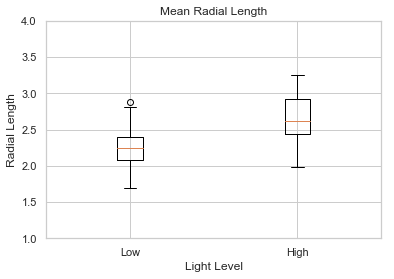

In [90]:
data = [mean_radial_length_low_FL, mean_radial_length_high_FL]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4)
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_title('Mean Radial Length')



plt.show()
# fig.savefig(out_path_fig_r + "\\" + "Mean_Radial_length_box.png")

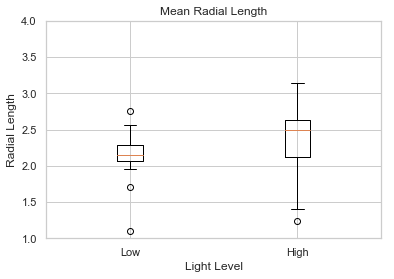

In [128]:
data = [mean_radial_length_low, mean_radial_length_high]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4)
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_title('Mean Radial Length')



plt.show()
fig.savefig(out_path_fig_r + "\\" + "EntireTrial_Mean_Radial_length_box.png")

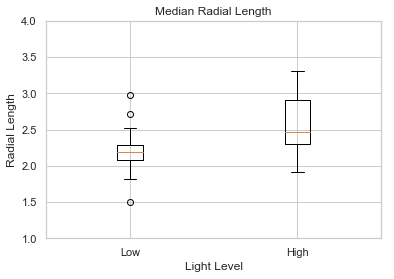

In [91]:
data_median = [median_radial_length_low_FL, median_radial_length_high_FL]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4)
ax.boxplot(data_median)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
# fig.savefig(out_path_fig_r + "\\" + "Median_Radial_length_box.png")

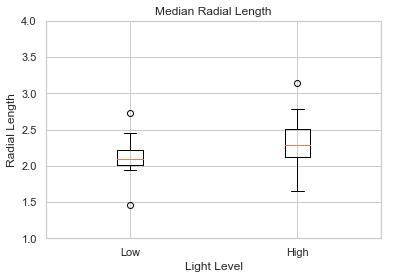

In [127]:
data_median = [median_radial_length_low, median_radial_length_high]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4)
ax.boxplot(data_median)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
fig.savefig(out_path_fig_r + "\\" + "EntireTrial_Median_Radial_length_box.png")

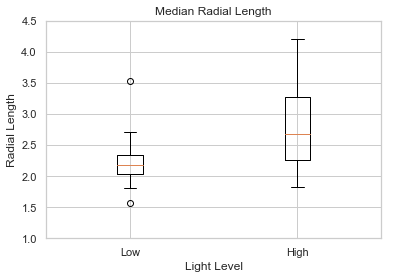

In [92]:
# Plotting the distribution of medians comparing light levels only considering the first trial
data_median_first = [median_radial_length_low_first, median_radial_length_high_first]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4.5)
ax.boxplot(data_median_first)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
# fig.savefig(out_path_fig_r + "\\" + "First_Median_Radial_length_box.png")

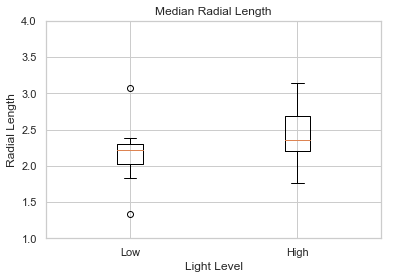

In [110]:
# Plotting the distribution of medians comparing light levels only considering the last trial
data_median_last = [median_radial_length_low_last, median_radial_length_high_last]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4)
ax.boxplot(data_median_last)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
fig.savefig(out_path_fig_r + "\\" + "Last_Median_Radial_length_box.png")

In [20]:
# the Welch's T-test assumes the distributions are normal, whereas the ks test makes no assumptions
# Testing significant differences between the population of means for each light level
sc.stats.ks_2samp(mean_radial_length_low, mean_radial_length_high)

Ks_2sampResult(statistic=0.4736842105263158, pvalue=0.018104933708057082)

In [114]:
# the Welch's T-test assumes the distributions are normal, whereas the ks test makes no assumptions
# Testing significant differences between the population of means for each light level
sc.stats.ks_2samp(mean_radial_length_low, mean_radial_length_high)

Ks_2sampResult(statistic=0.4210526315789474, pvalue=0.04859791681048602)

In [21]:
# Testing significant differences between the population of medians for each light level considering all trials
sc.stats.ks_2samp(median_radial_length_low, median_radial_length_high)

Ks_2sampResult(statistic=0.5789473684210527, pvalue=0.0017733458434129141)

In [116]:
# Testing significant differences between the population of medians for each light level considering all trials
sc.stats.ks_2samp(median_radial_length_low, median_radial_length_high)

Ks_2sampResult(statistic=0.42105263157894735, pvalue=0.048597916810486086)

In [94]:
# Testing significant differences between the population of medians for each light level only considering the first trial
sc.stats.ks_2samp(median_radial_length_low_first, median_radial_length_high_first)

Ks_2sampResult(statistic=0.4210526315789474, pvalue=0.04859791681048602)

In [95]:
# Testing significant differences between the population of medians for each light level only considering the last trial
sc.stats.ks_2samp(median_radial_length_low_last, median_radial_length_high_last)

Ks_2sampResult(statistic=0.411764705882353, pvalue=0.08130199487731245)

In [24]:
# Testing significant differences between the population of std for each light level
sc.stats.ks_2samp(standard_deviation_low, standard_deviation_high)

Ks_2sampResult(statistic=0.368421052631579, pvalue=0.11612219978272925)

In [25]:
# Testing significant differences between the population of iqr for each light level
sc.stats.ks_2samp(iqr_low, iqr_high)

Ks_2sampResult(statistic=0.368421052631579, pvalue=0.11612219978272925)

In [68]:
# Testing significant differences between the population of iqr for each light level only considering the first trial
sc.stats.ks_2samp(iqr_lowf, iqr_highf)

Ks_2sampResult(statistic=0.3157894736842105, pvalue=0.27496669931314915)

In [69]:
# Testing significant differences between the population of iqr for each light level only considering the last trial
sc.stats.ks_2samp(iqr_lowl, iqr_highl)

Ks_2sampResult(statistic=0.17279411764705882, pvalue=0.946945739963008)

In [71]:
# Testing significant differences between the population of iqr for each light level only considering low light
sc.stats.ks_2samp(iqr_lowf, iqr_lowl)

Ks_2sampResult(statistic=0.5294117647058822, pvalue=0.010041248696277276)

In [28]:
# standard deviation of the distribution of means for each light level
np.std(mean_radial_length_low), np.std(mean_radial_length_high)

(0.27757544577213145, 0.5465732264419846)

In [29]:
# iqr of the distribution of medians for each light level
sc.stats.iqr(median_radial_length_low), sc.stats.iqr(median_radial_length_high)

(0.2274453523060731, 0.5707793483882222)

(array([0.05263158, 0.        , 0.05263158, 0.05263158, 0.15789474,
        0.26315789, 0.21052632, 0.05263158, 0.10526316, 0.05263158]),
 array([1.08923706, 1.34395163, 1.59866621, 1.85338078, 2.10809536,
        2.36280993, 2.6175245 , 2.87223908, 3.12695365, 3.38166822,
        3.6363828 ]),
 <a list of 10 Patch objects>)

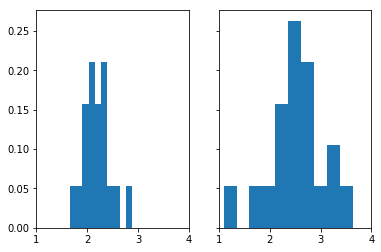

In [30]:
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
weights = np.ones_like(mean_radial_length_low)/float(len(mean_radial_length_low))
weights_hi = np.ones_like(mean_radial_length_high)/float(len(mean_radial_length_high))
ax[0].hist(mean_radial_length_low, weights=weights)
ax[0].set_xlim(1,4)
ax[1].hist(mean_radial_length_high, weights=weights_hi)

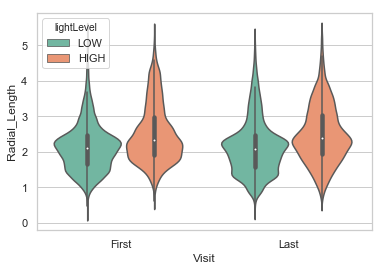

In [96]:

ax = sns.violinplot(x="Visit", y="Radial_Length", hue = "lightLevel", data=FL_df, palette="Set2")
fig = ax.get_figure()

# fig.savefig(out_path_fig_r + "\\" + "All_Radial_length_violin.png")

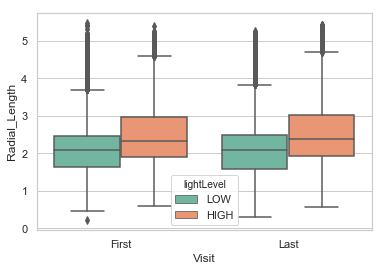

In [97]:

ax = sns.boxplot(x="Visit", y="Radial_Length", hue = "lightLevel", data=FL_df, palette="Set2")
fig = ax.get_figure()


# fig.savefig(out_path_fig_r + "\\" + "All_Radial_length_box.png")

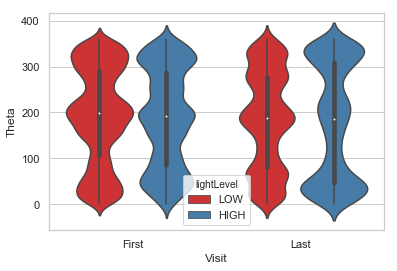

In [74]:

ax = sns.violinplot(x="Visit", y="Theta", hue = "lightLevel", data=FL_df, palette="Set1")
fig = ax.get_figure()

# fig.savefig(out_path_fig_t + "\\" + "All_Theta_violin.png")

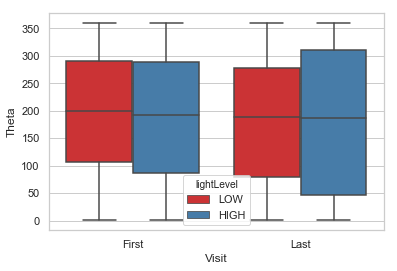

In [75]:

ax = sns.boxplot(x="Visit", y="Theta", hue = "lightLevel", data=FL_df, palette="Set1")
fig = ax.get_figure()
# out_path_fig_t = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot"
# fig.savefig(out_path_fig_t + "\\" + "All_Theta_box.png")

L0.1_c-3_m24
L0.1_c-3_m39
L50_c-3_m24
L50_c-3_m35


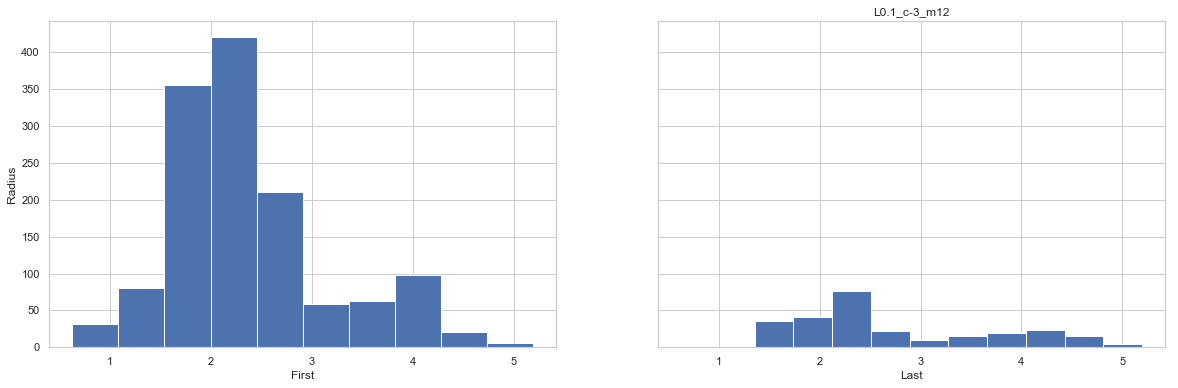

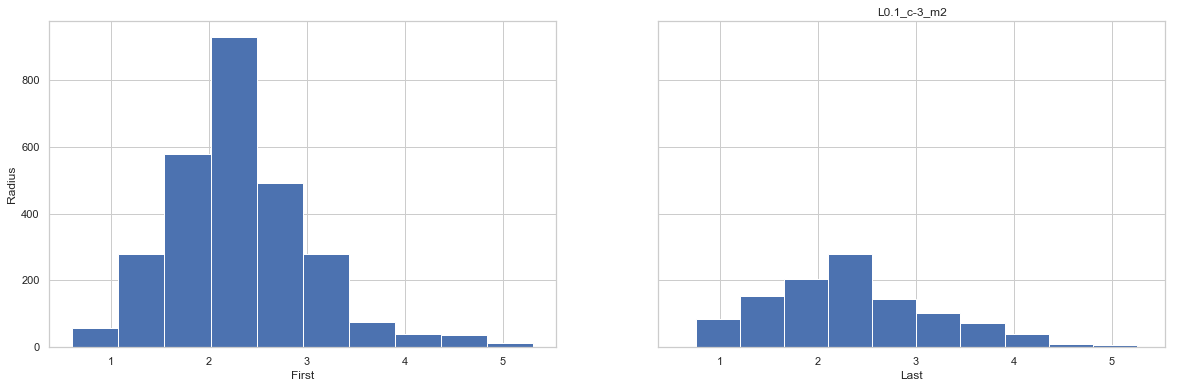

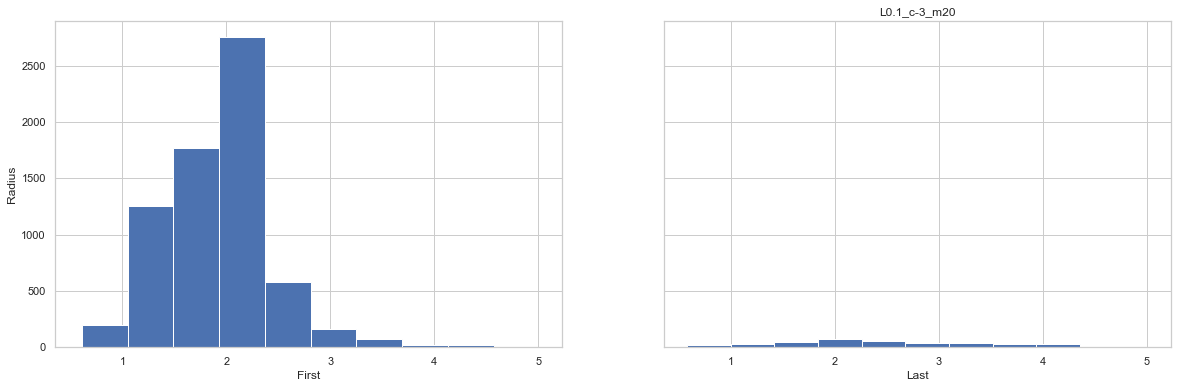

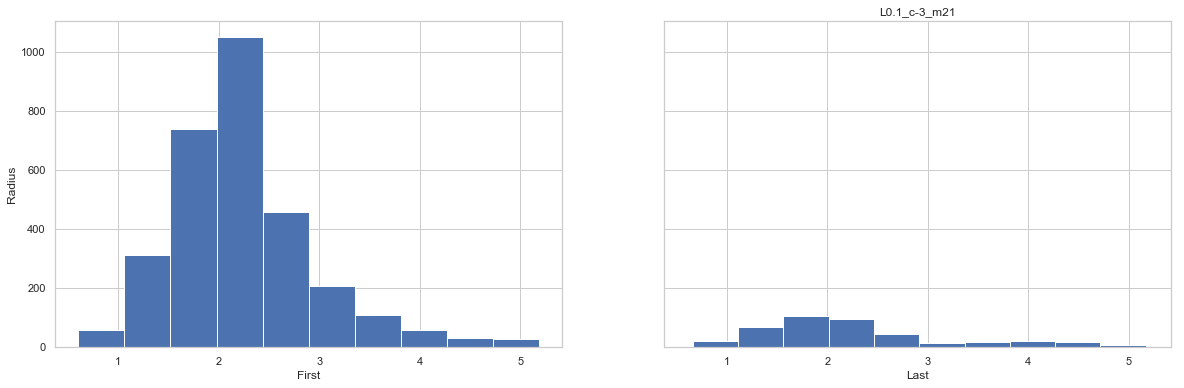

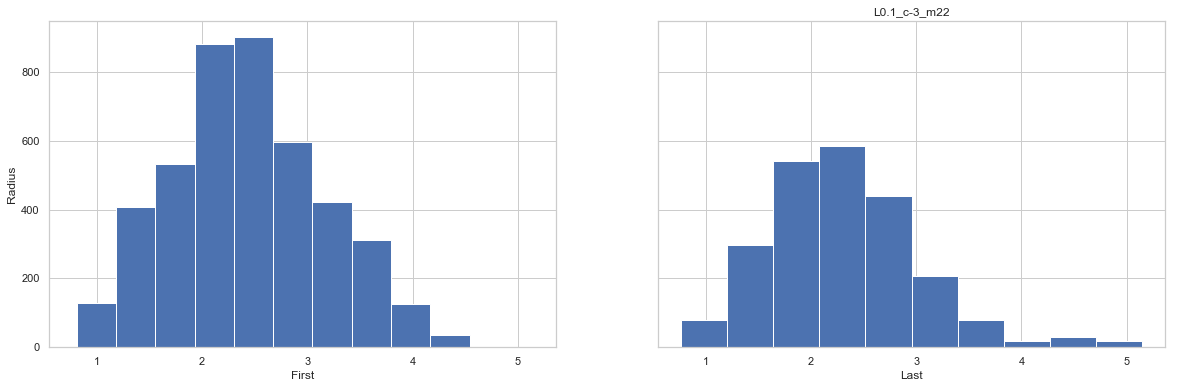

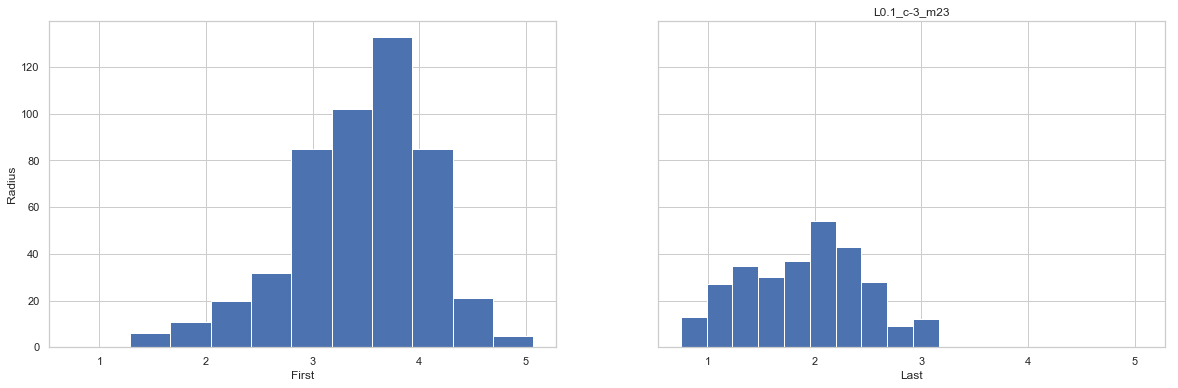

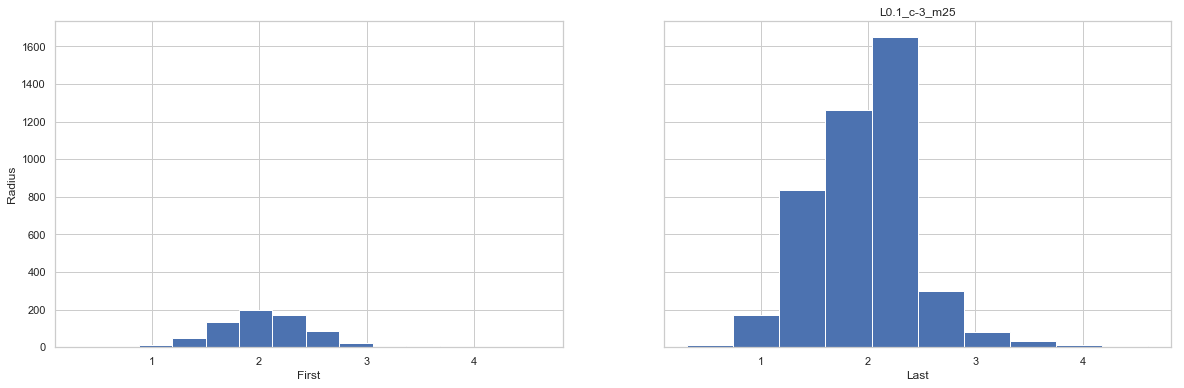

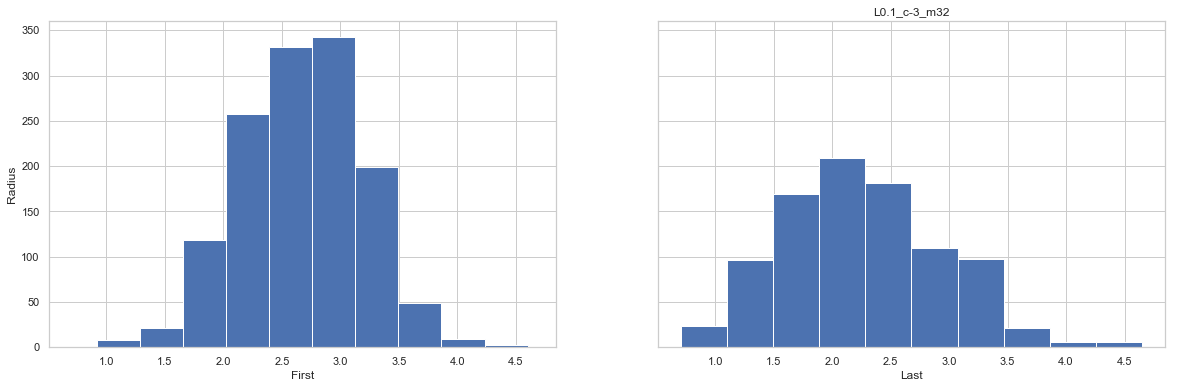

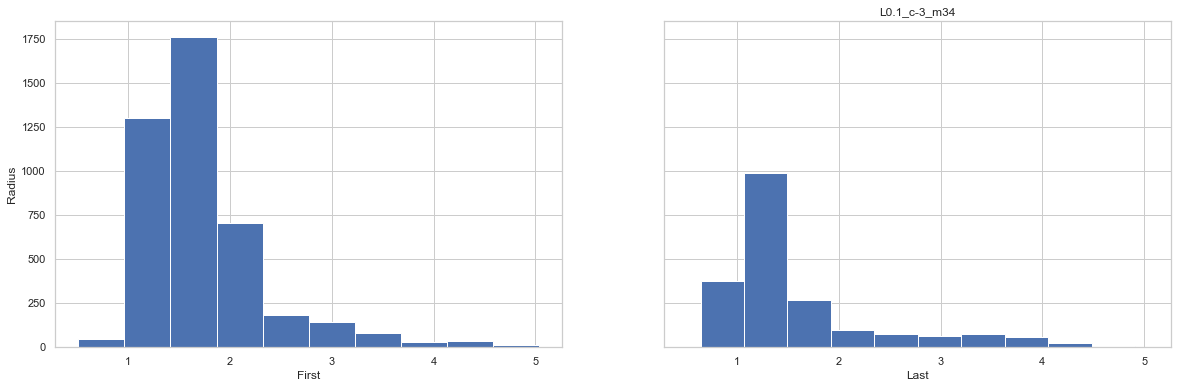

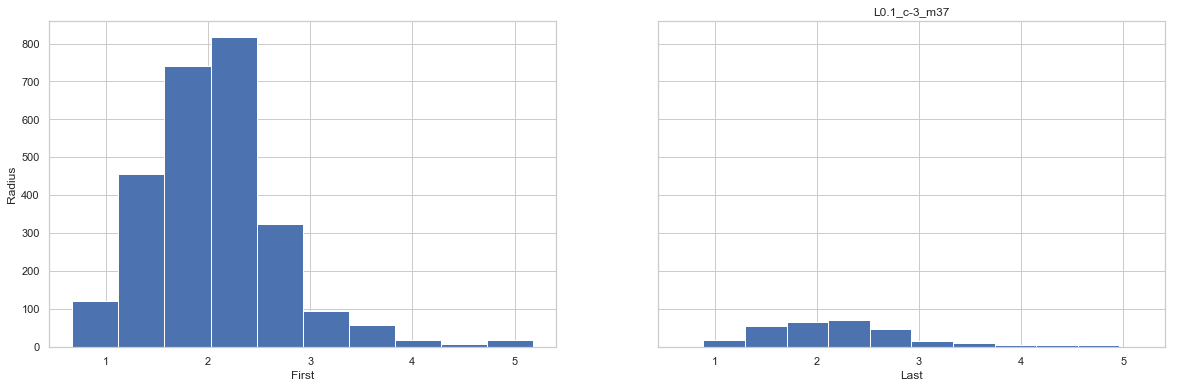

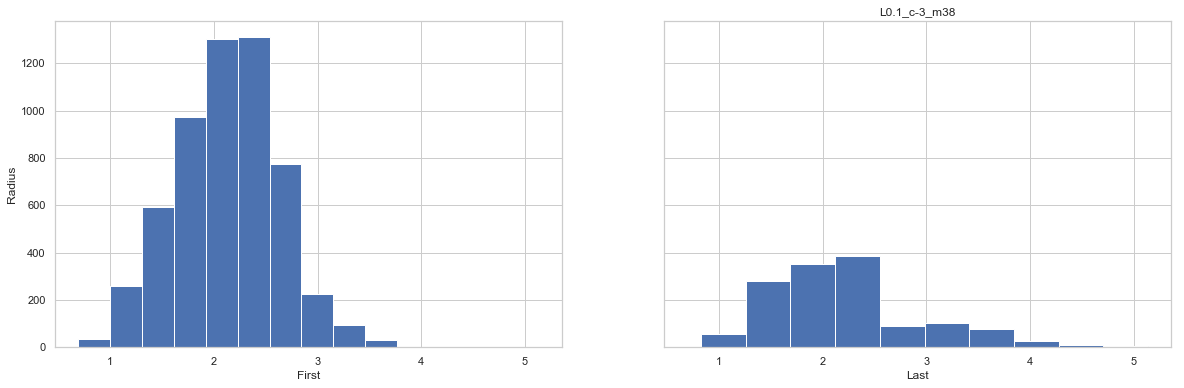

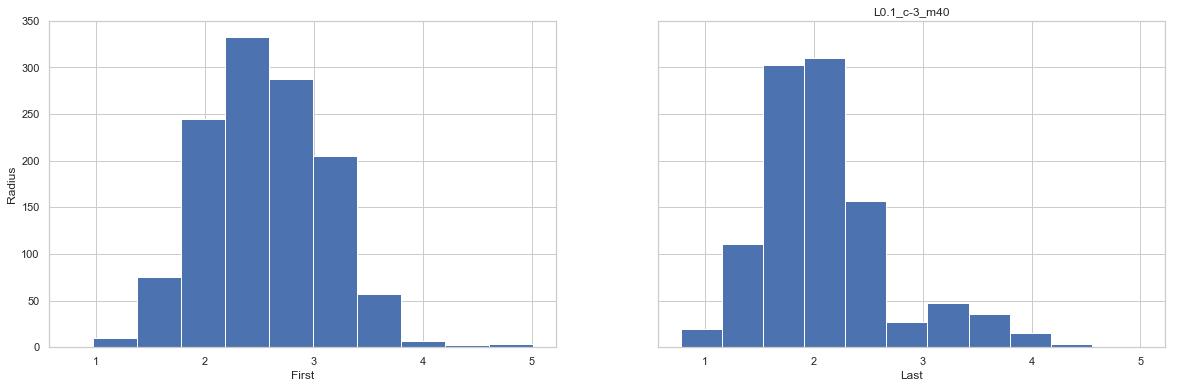

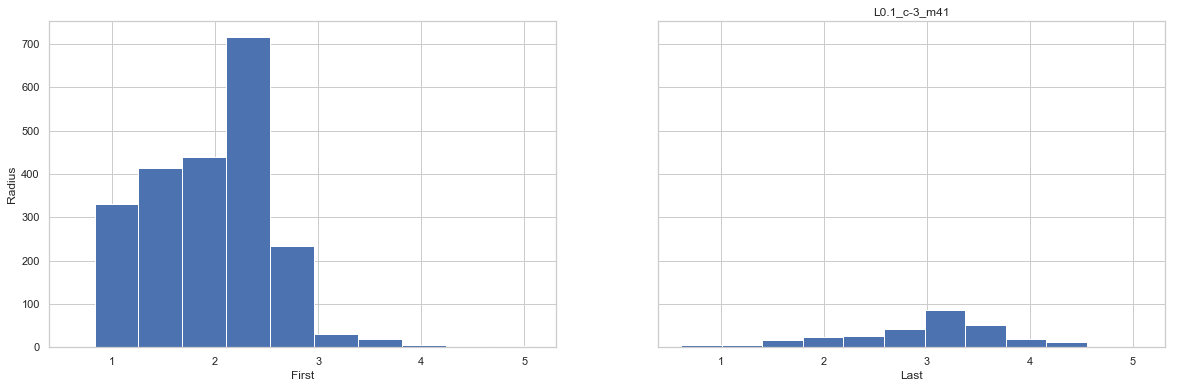

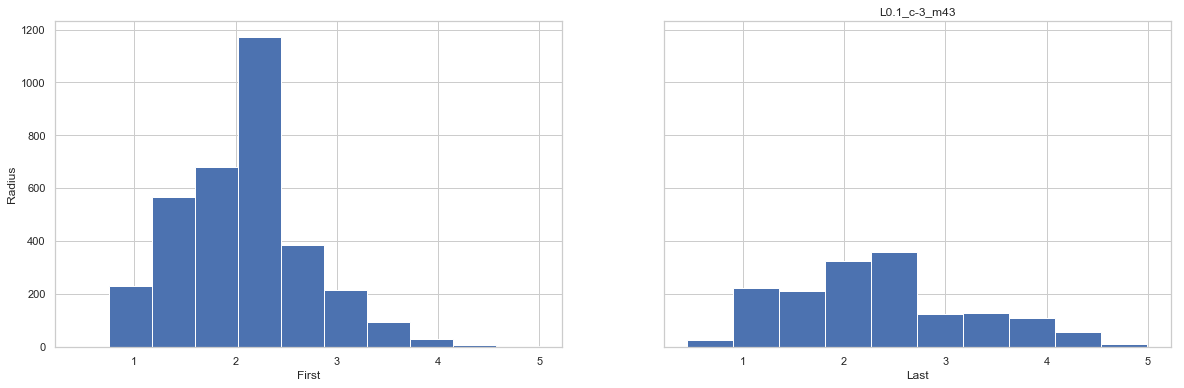

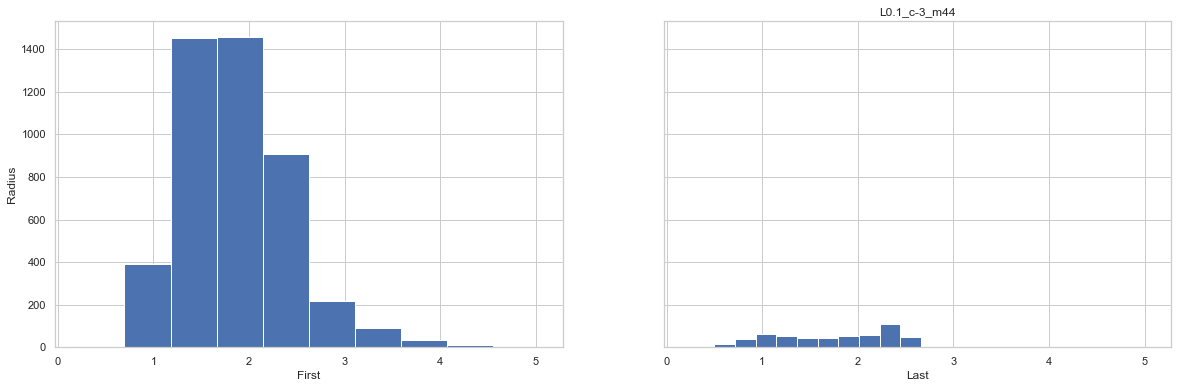

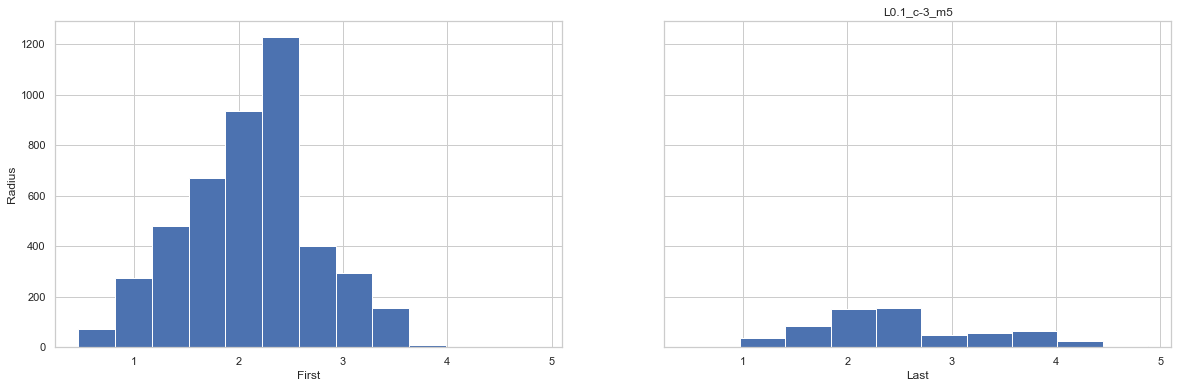

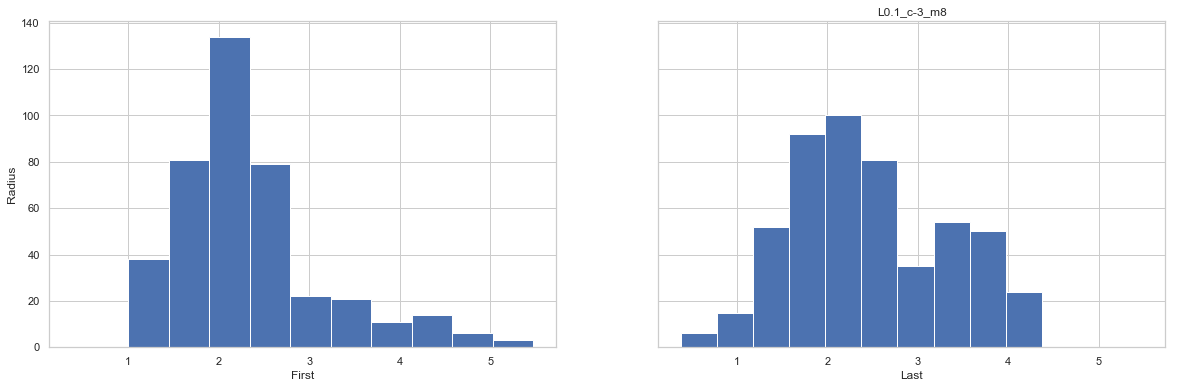

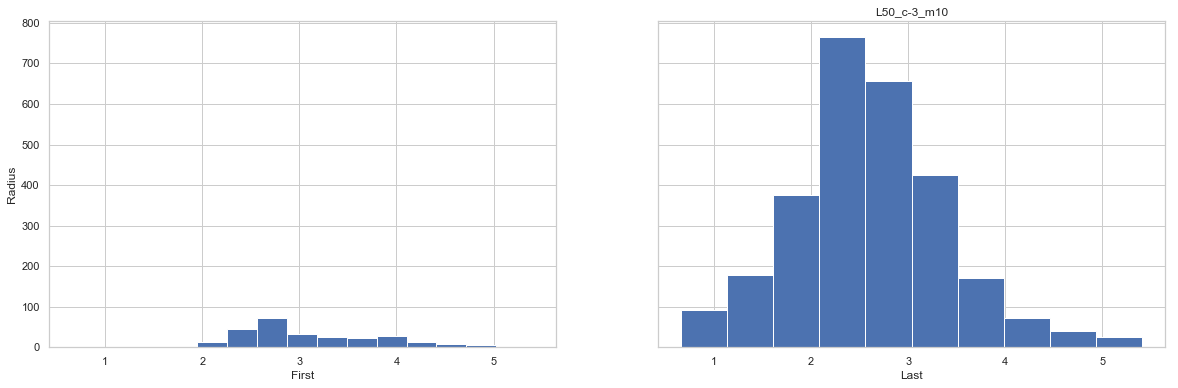

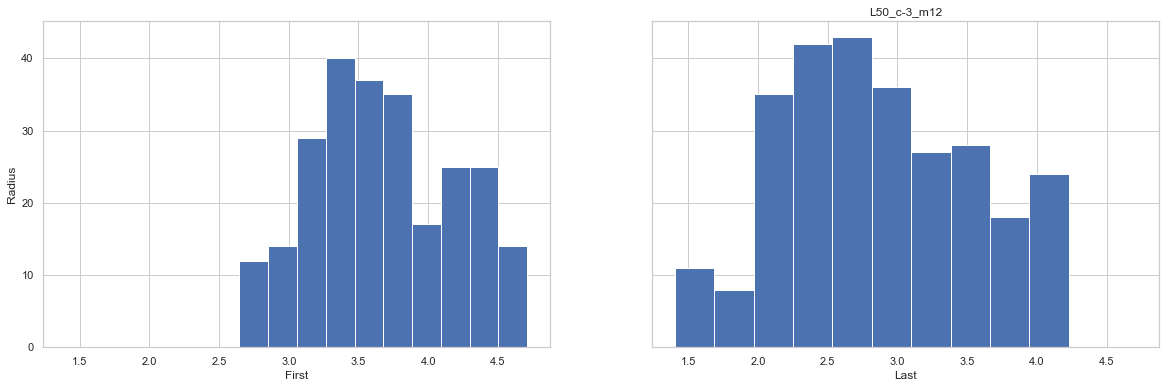

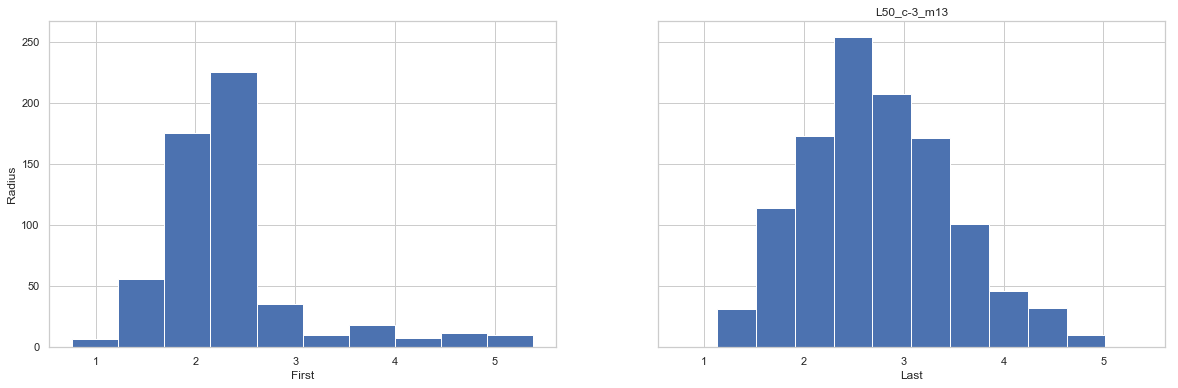

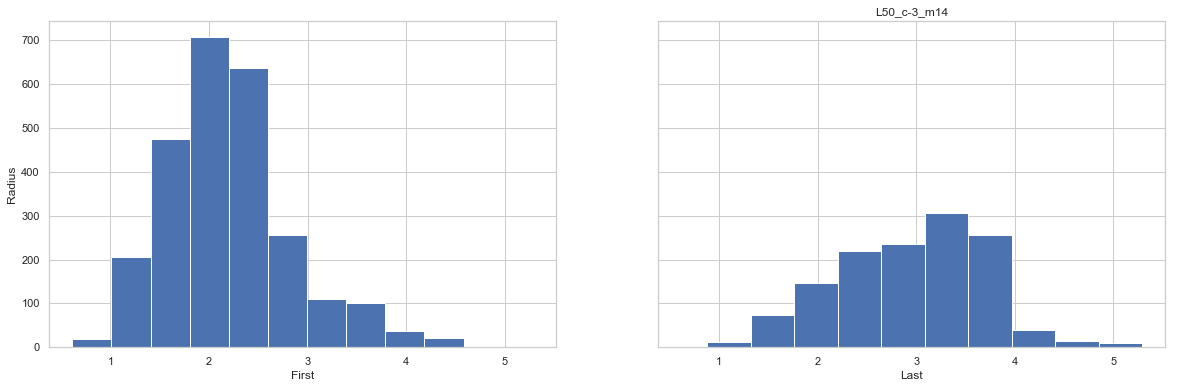

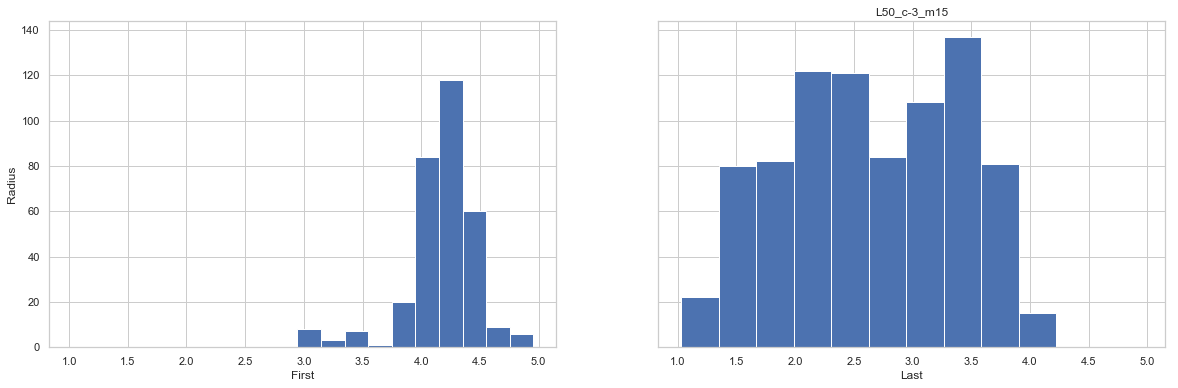

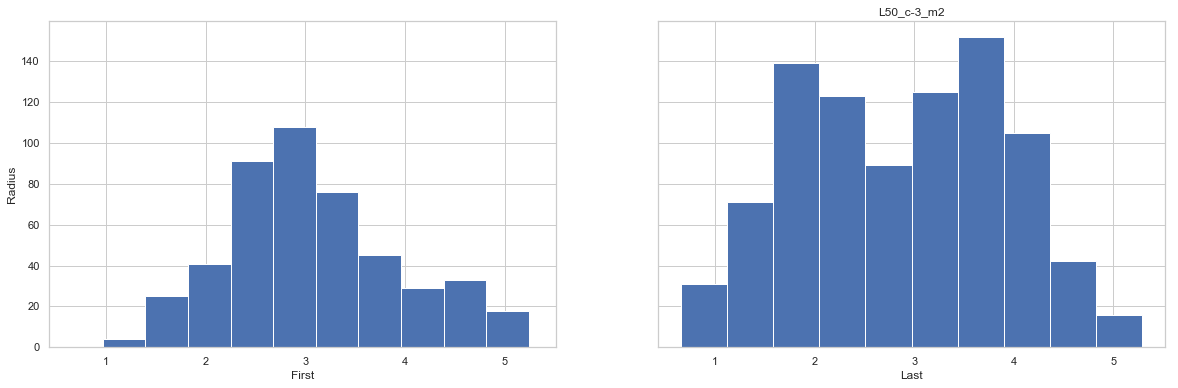

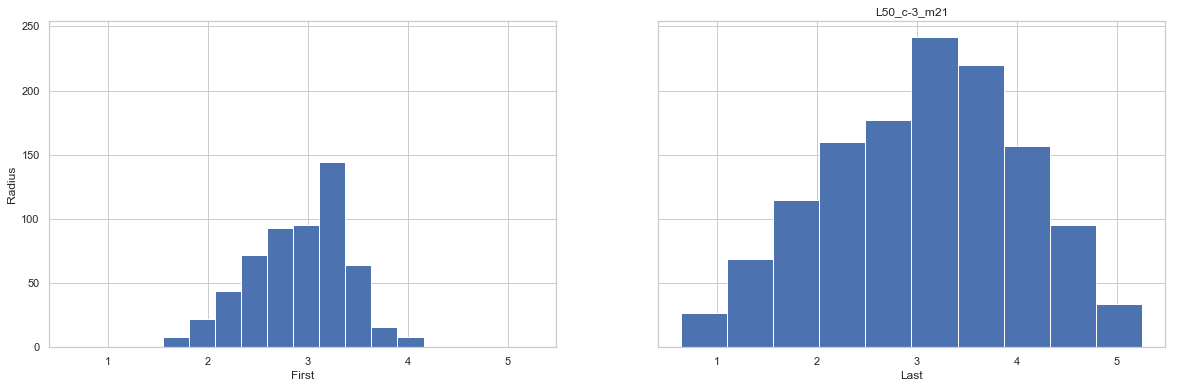

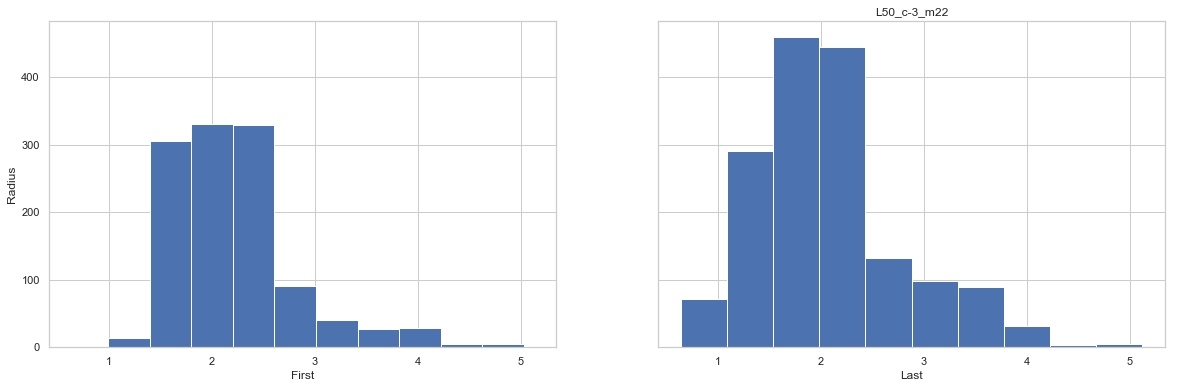

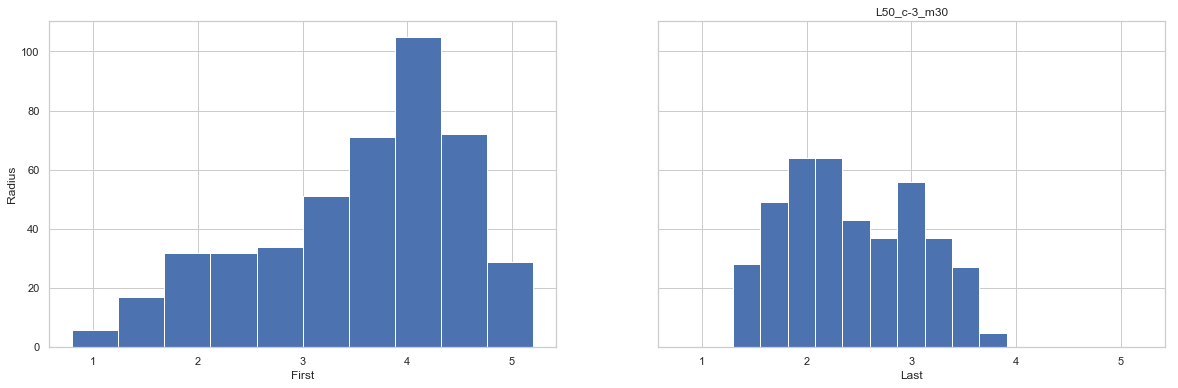

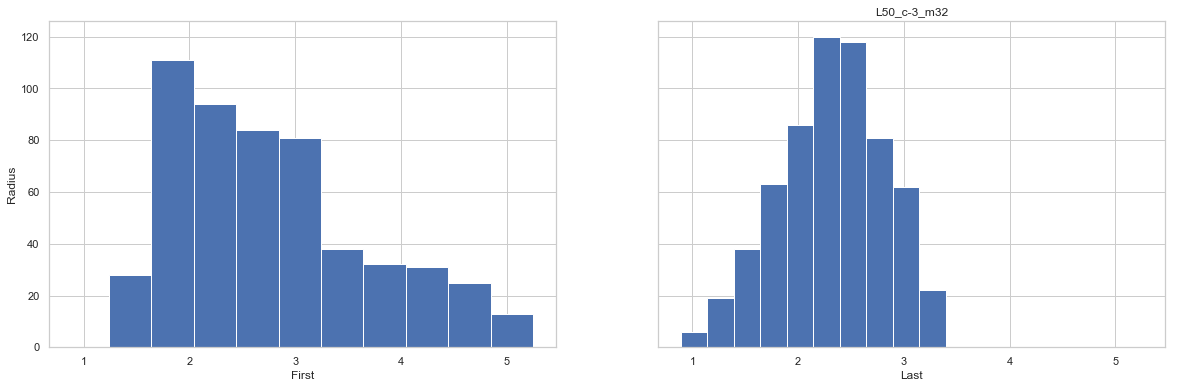

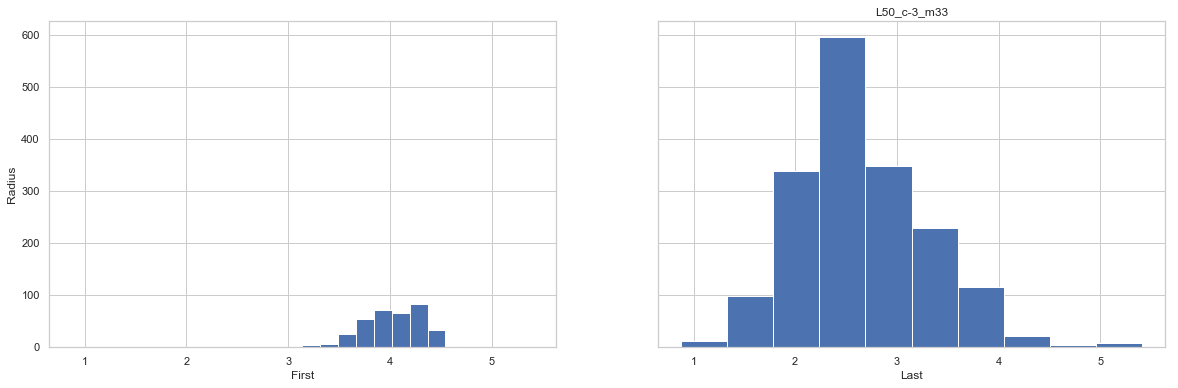

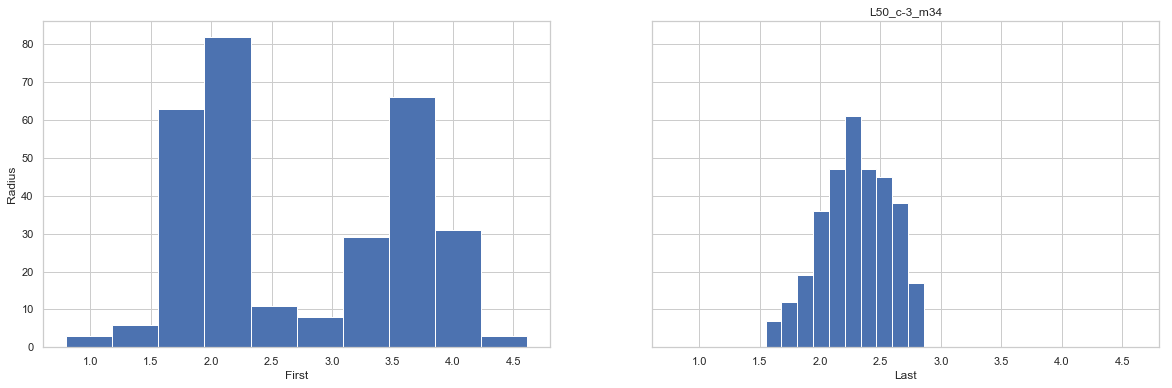

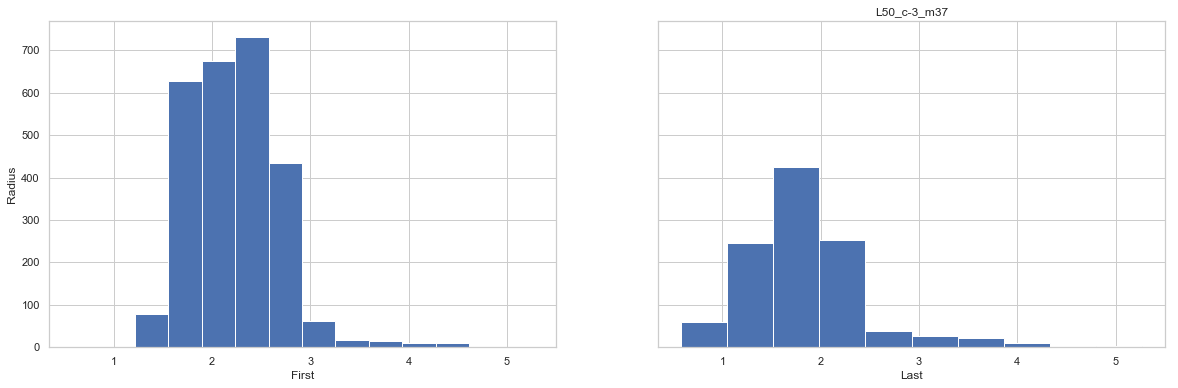

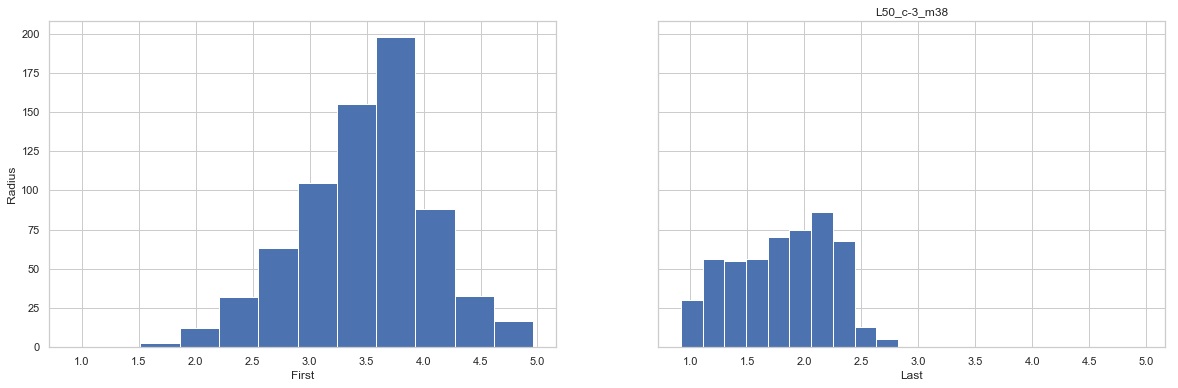

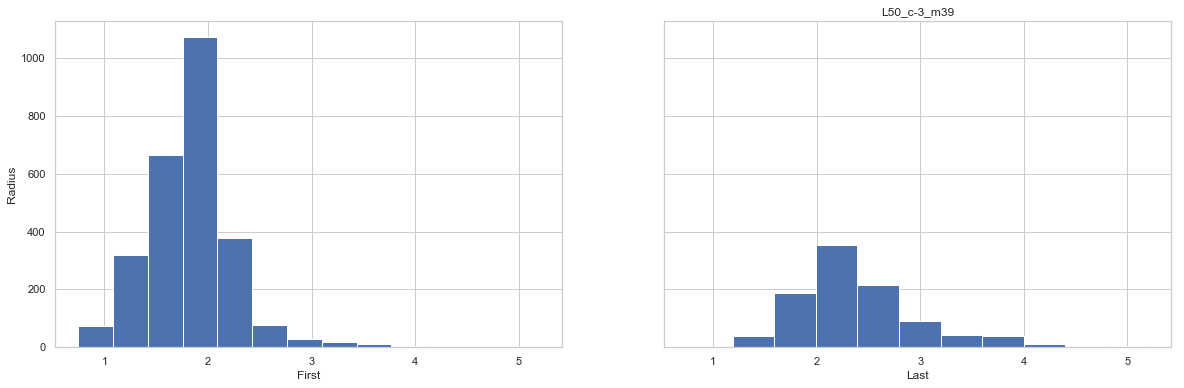

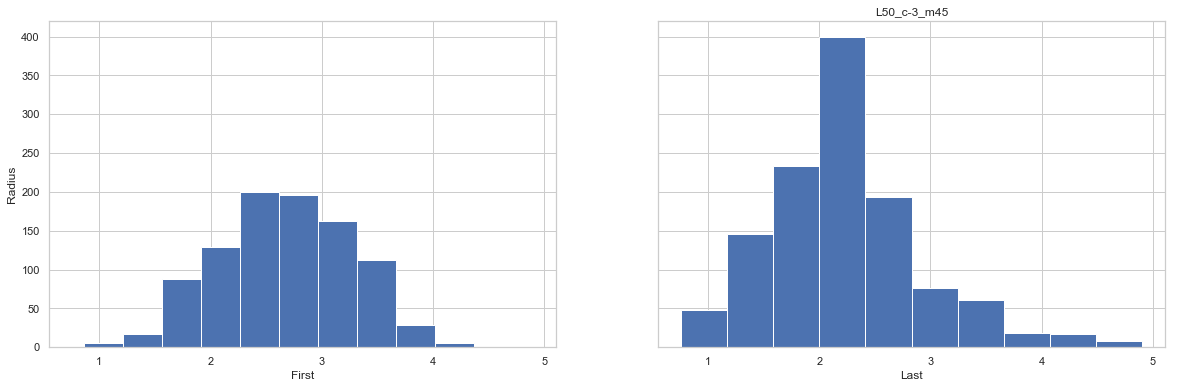

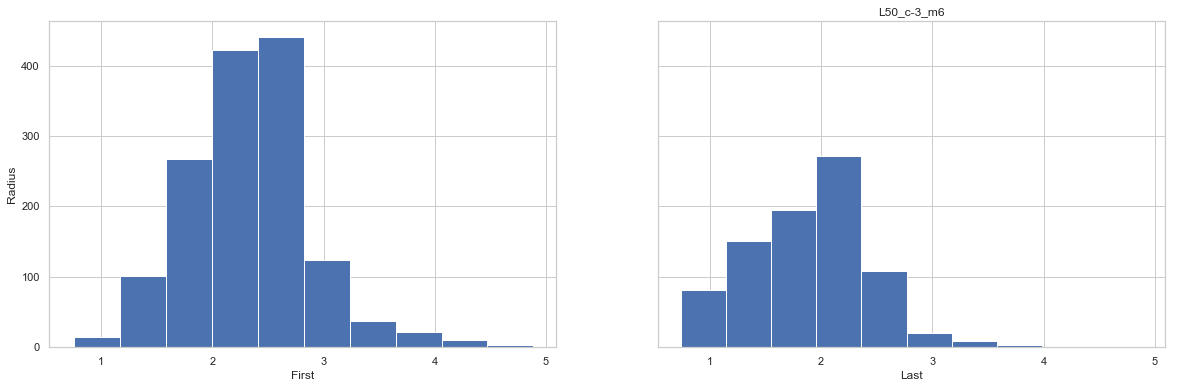

In [98]:
#plot in terms of r
for name in nam_51:
    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    
#     if len(list(rad_first_visit)) > 0:
    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), )
        ax[0].hist(rad_first_visit)
        ax[0].set_ylabel("Radius")
        ax[0].set_xlabel("First")
        ax[1].hist(rad_last_visit)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Radial_Plot" + "\\" + name + ".png")
    else:
        print(name)

L0.1_c-3_m24
L0.1_c-3_m39
L50_c-3_m24
L50_c-3_m35


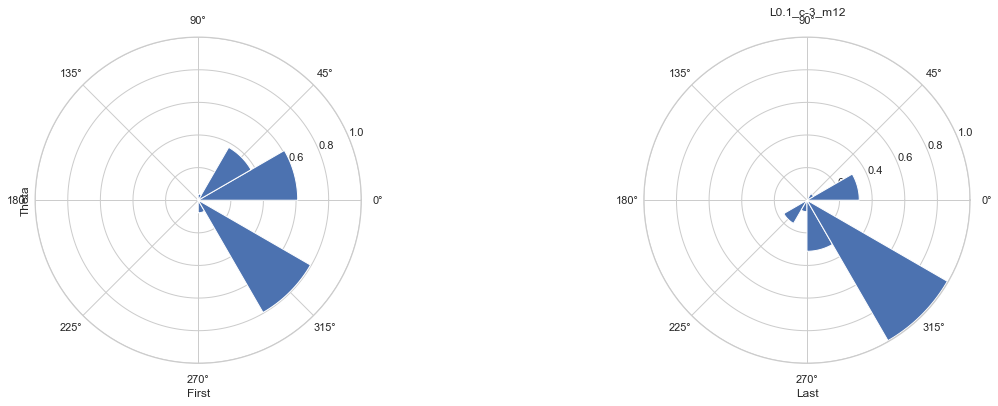

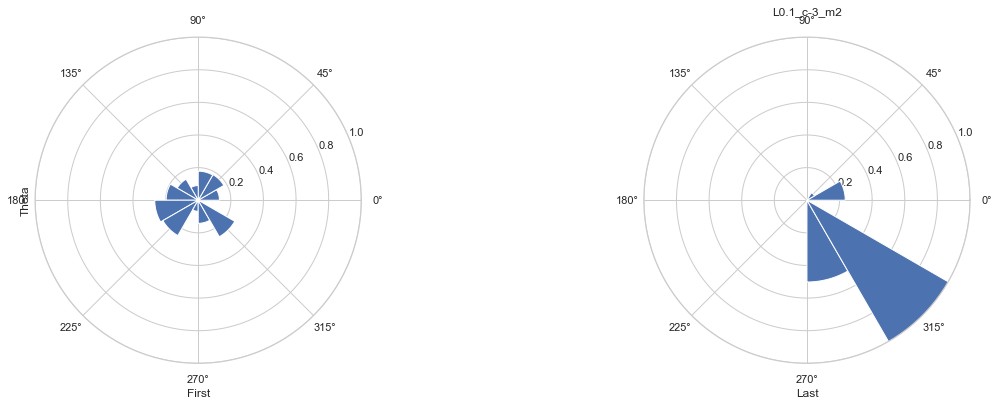

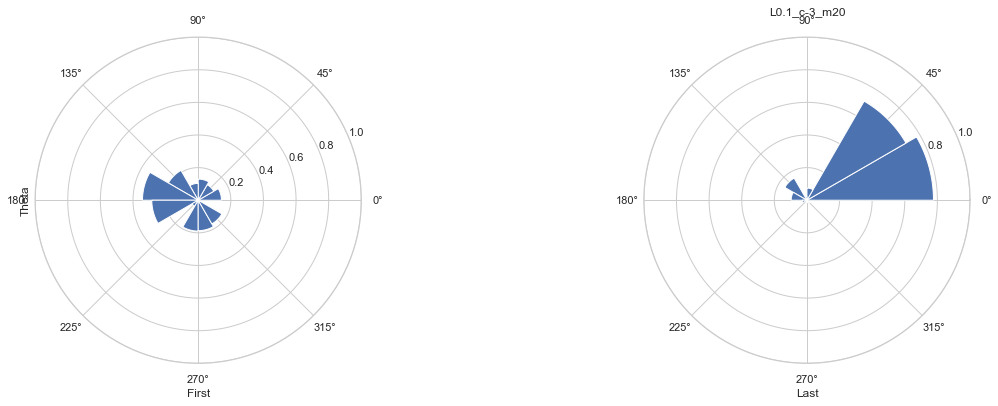

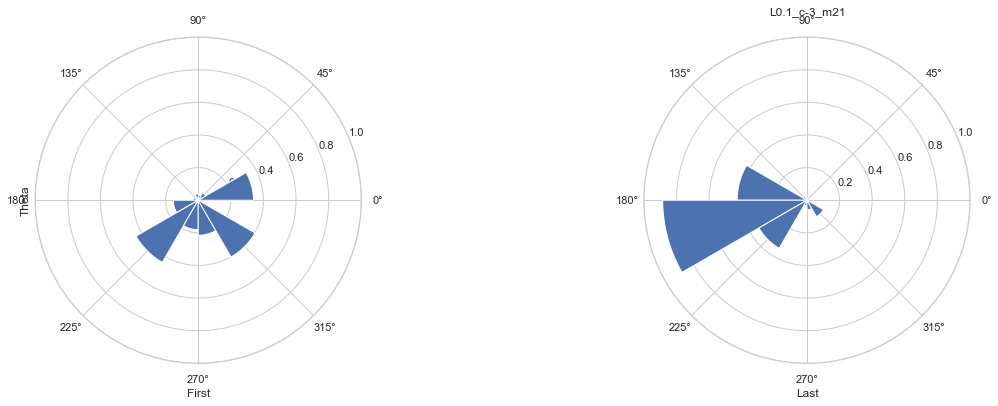

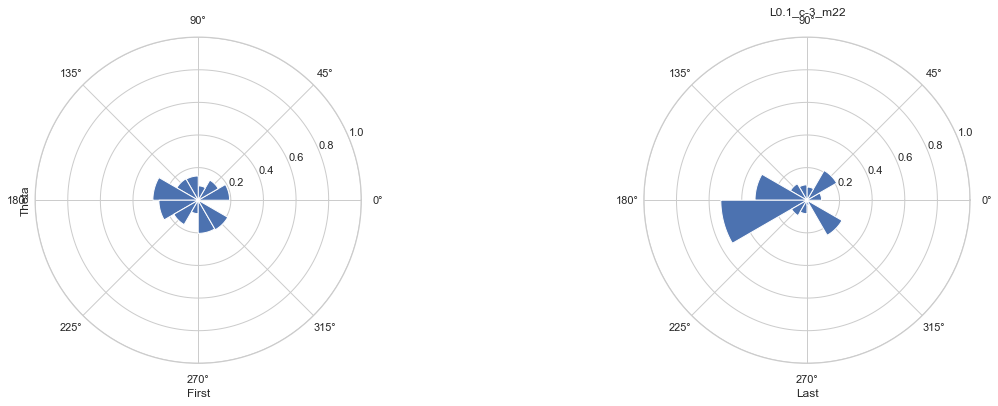

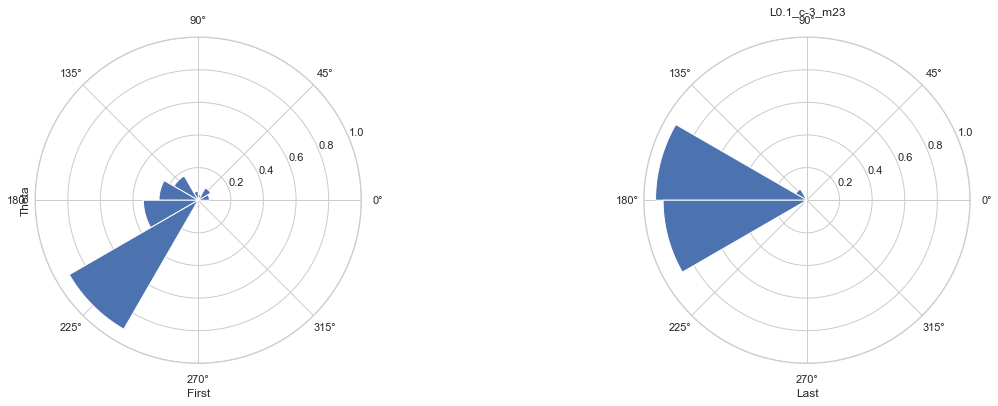

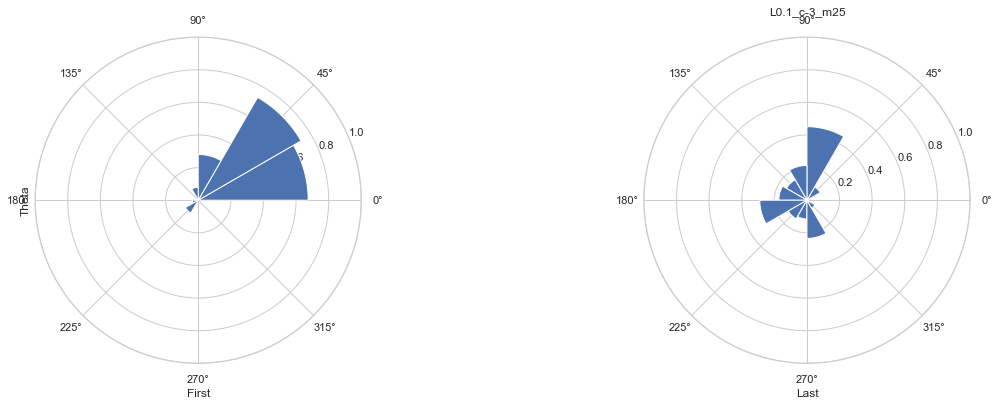

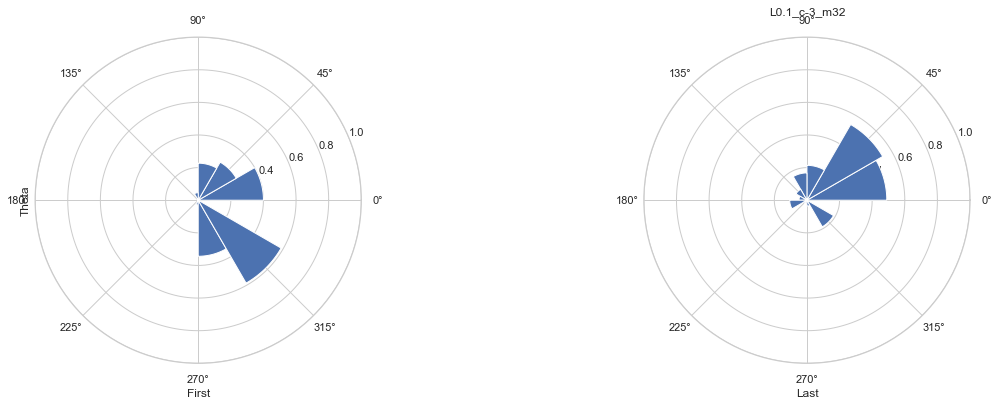

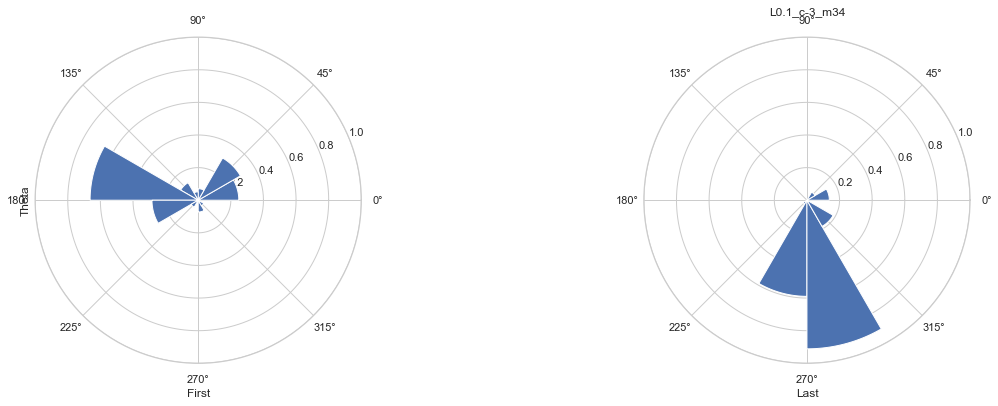

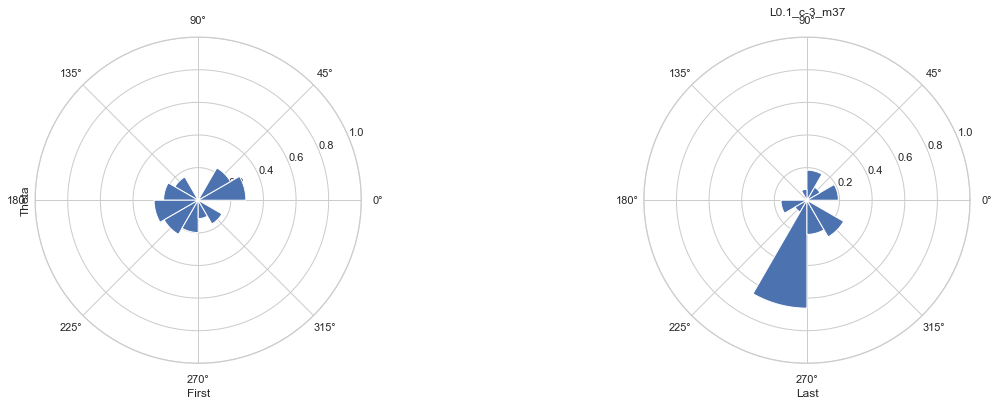

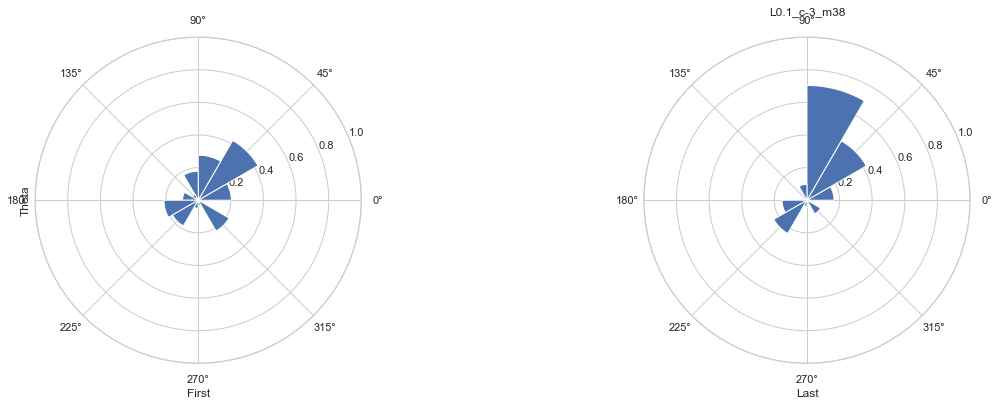

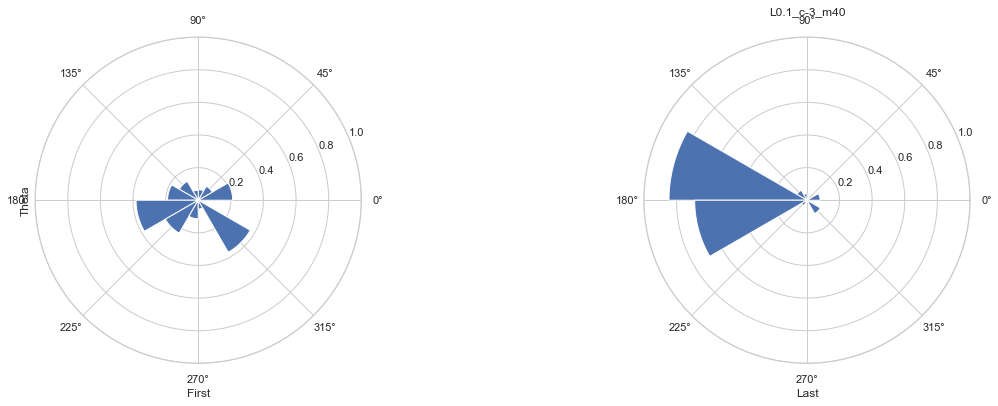

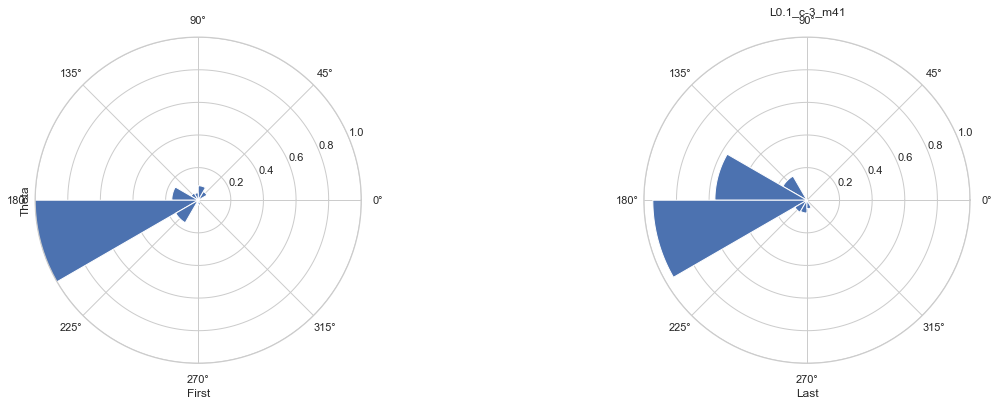

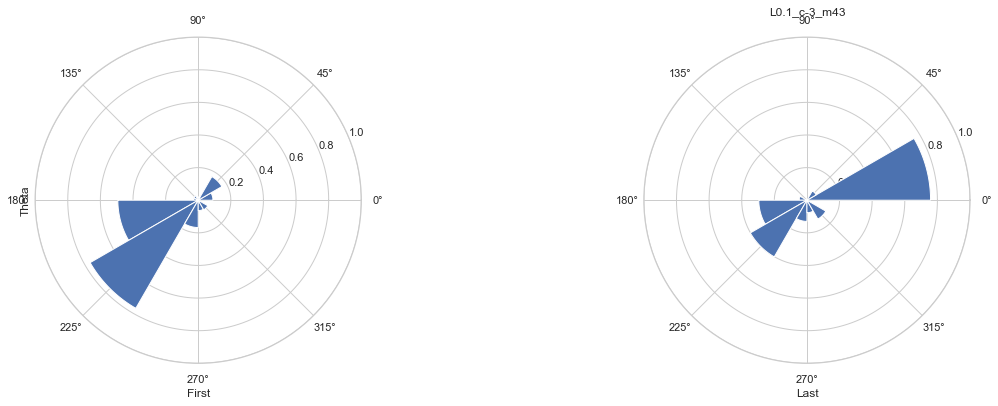

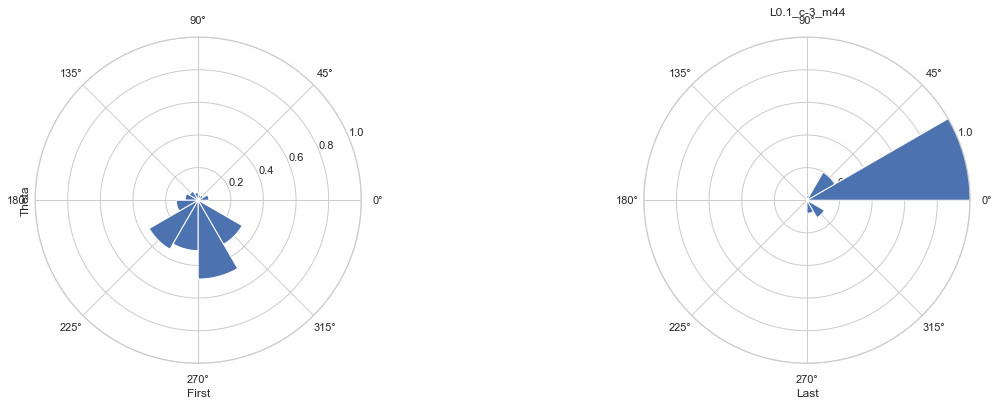

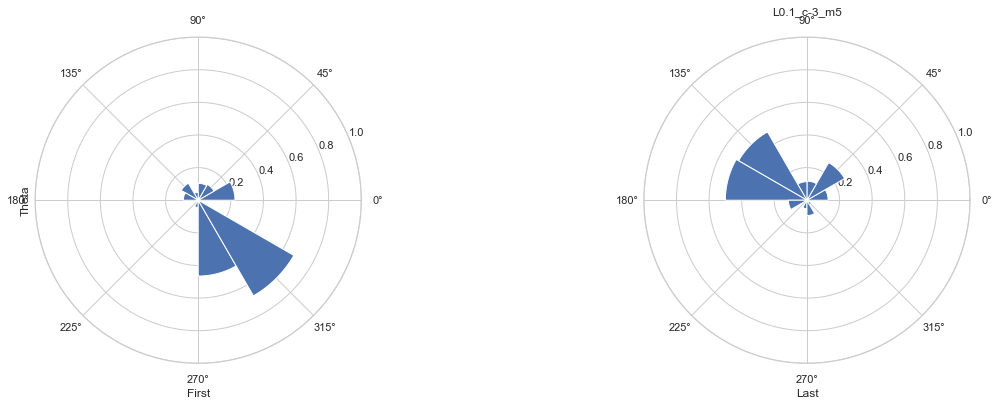

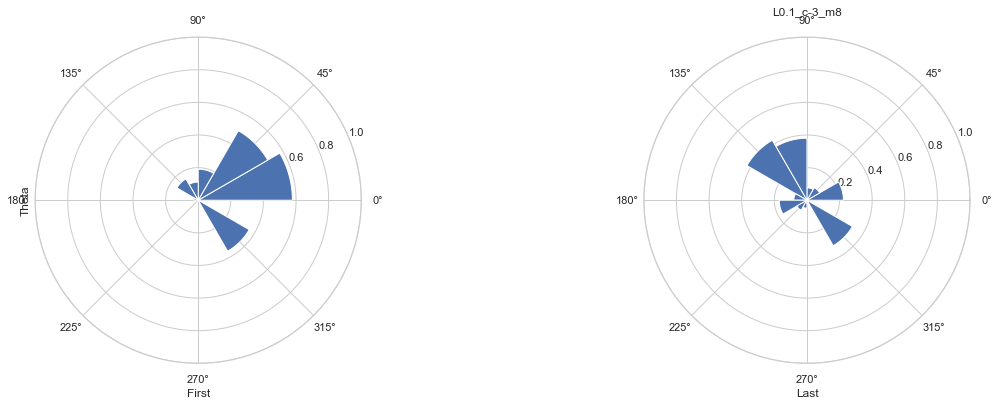

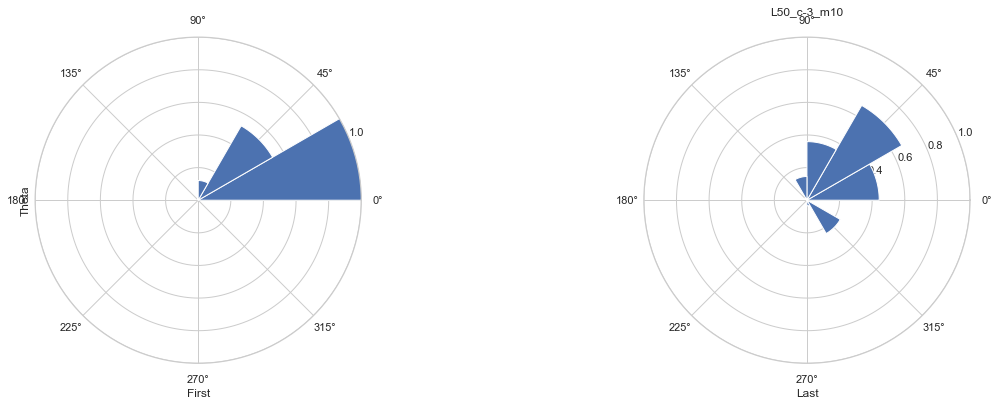

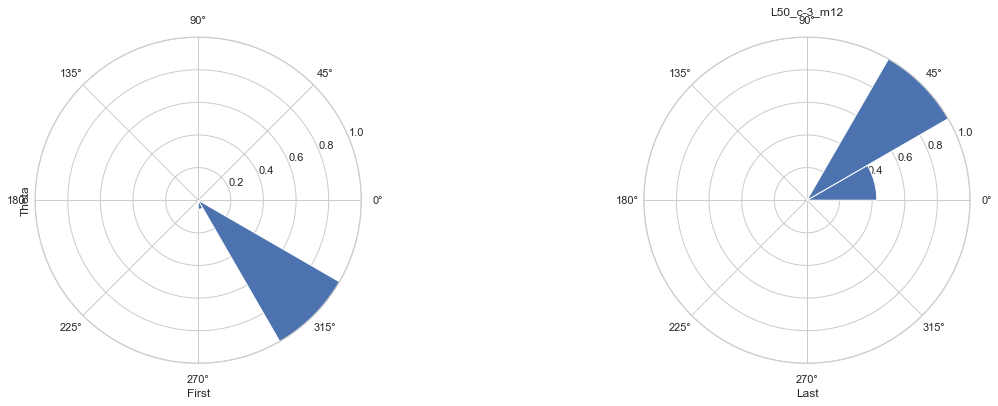

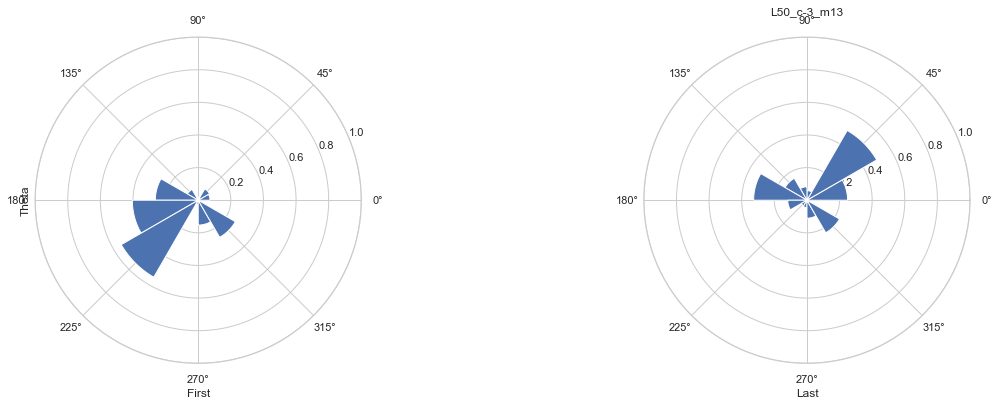

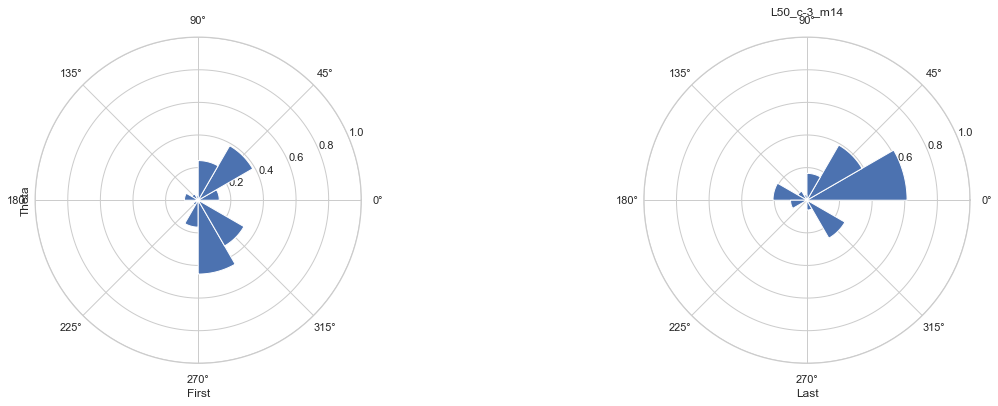

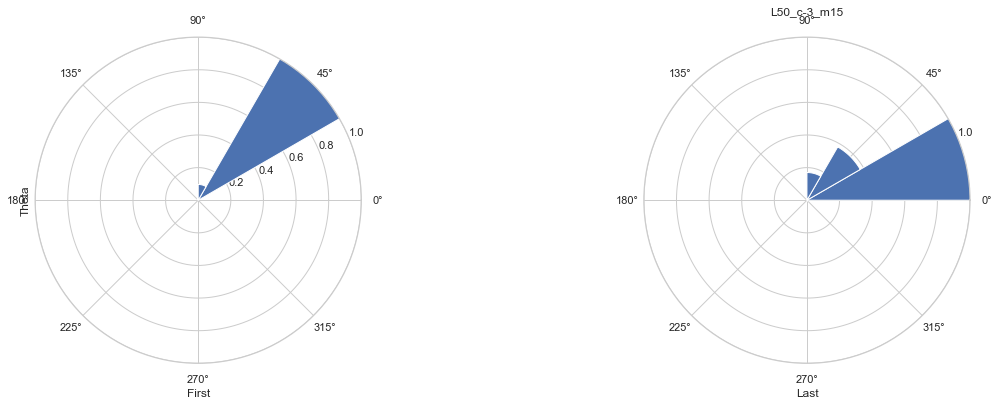

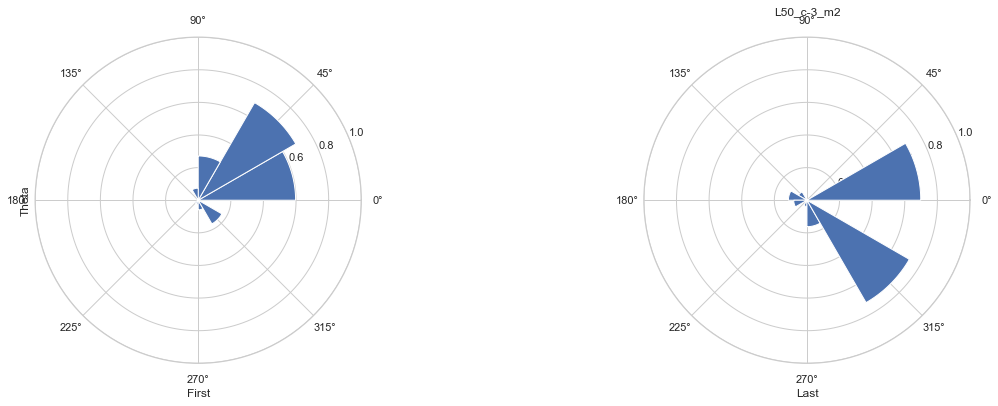

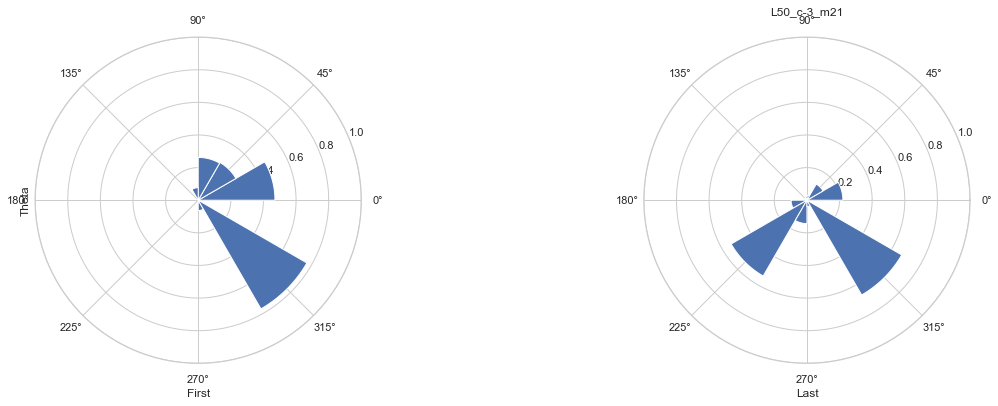

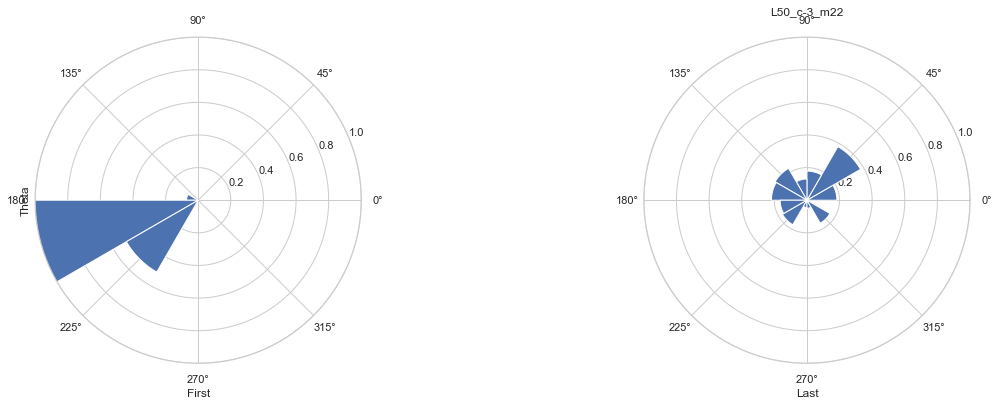

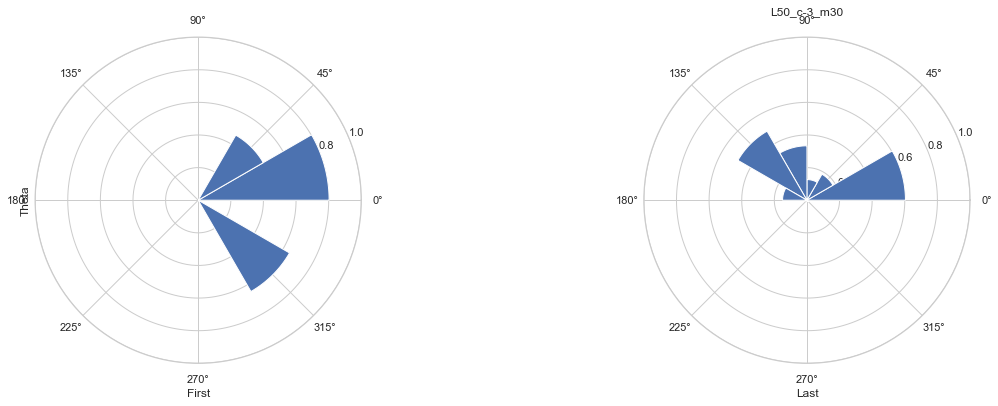

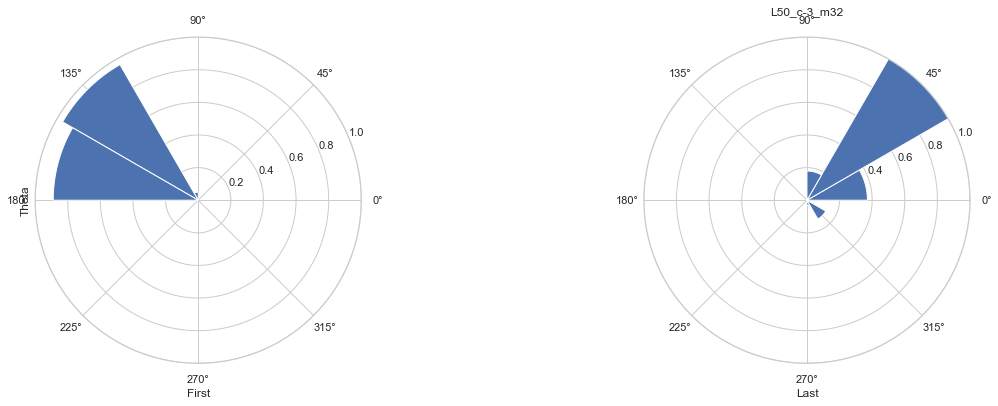

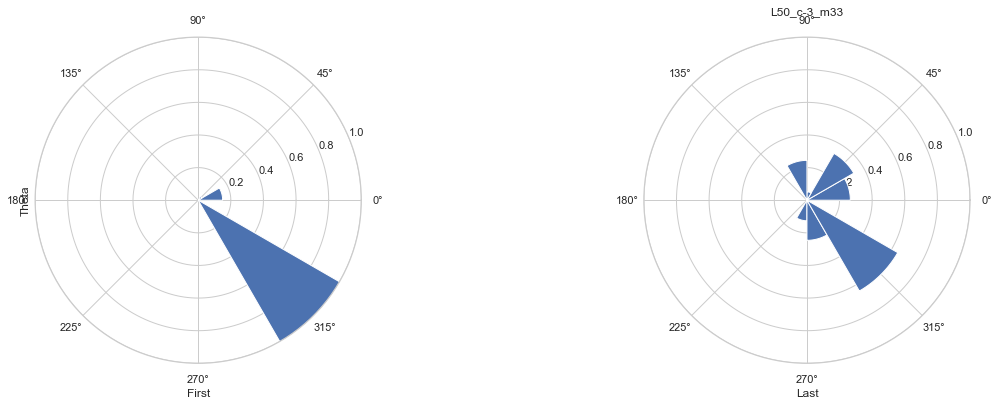

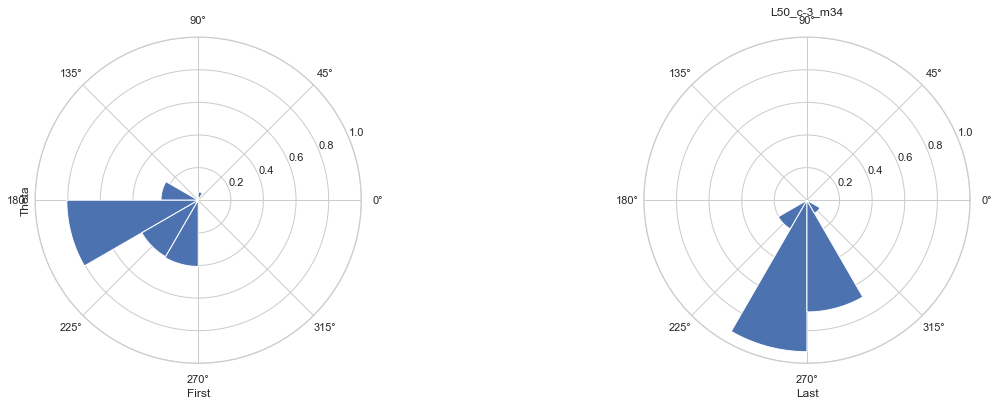

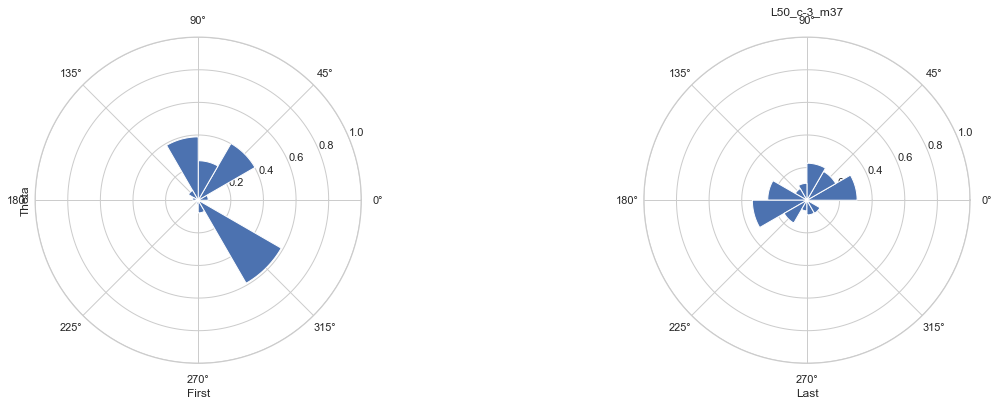

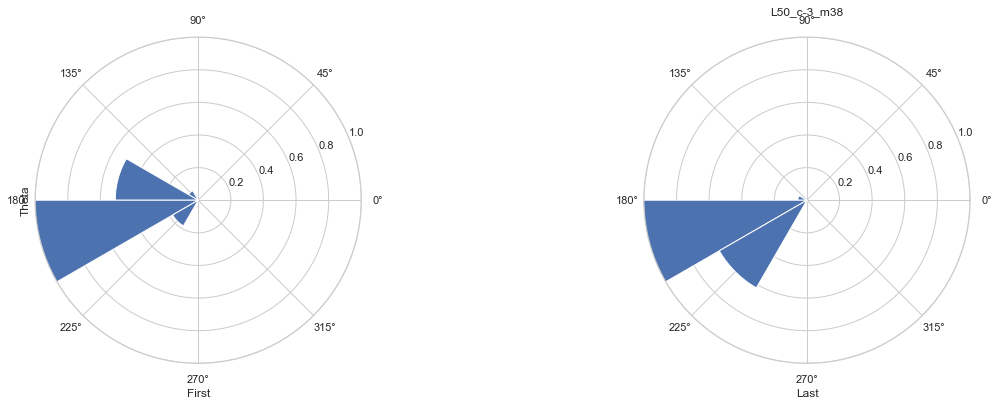

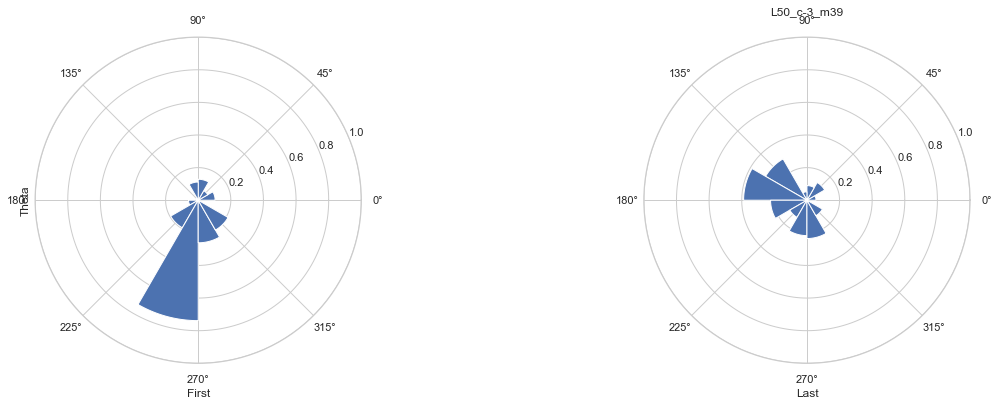

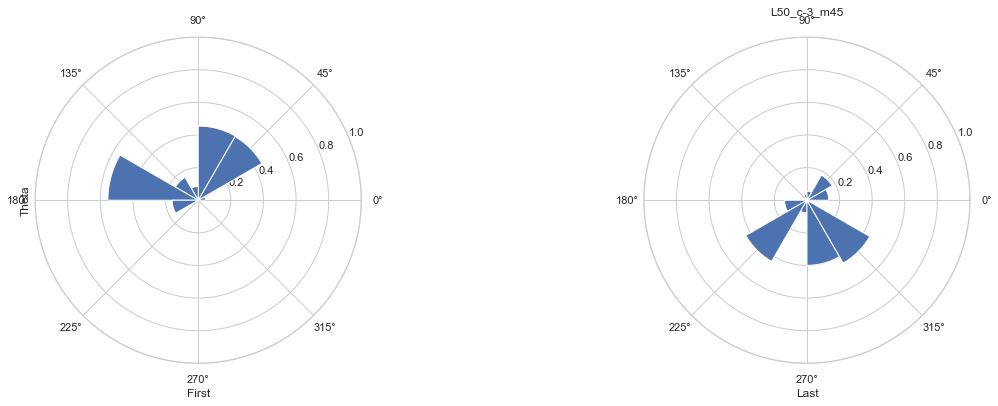

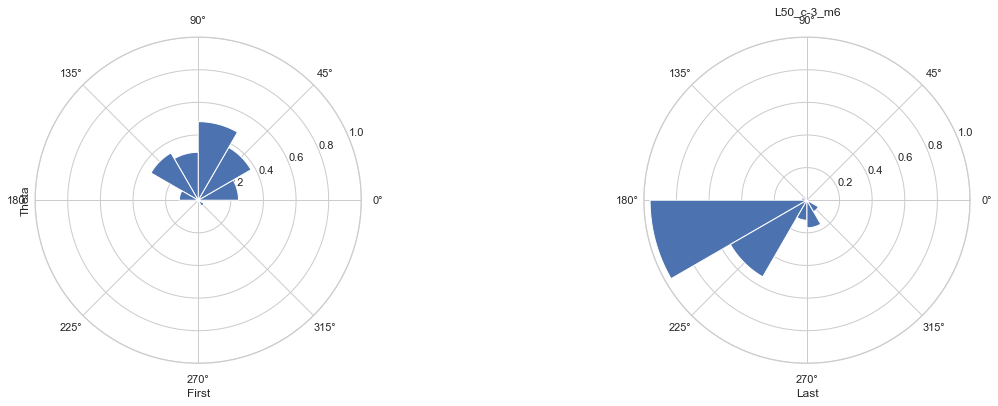

In [99]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Theta * np.pi/180

    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    
    

    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (20,6), subplot_kw=dict(polar=True))

        
        nbin =np.asarray([0, 30, 60,90,120,150,180,210,240,270,300,330])*np.pi/180.0
        ax[0].hist(theta_pulled_first, bins = nbin, density = True)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[0].set_ylim(0,1)
        ax[1].hist(theta_pulled_last, bins = nbin, density = True)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        ax[1].set_ylim(0,1)

#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot\Rose" + "\\" + name + "_Hist.png")
    else:
        print(name)
    


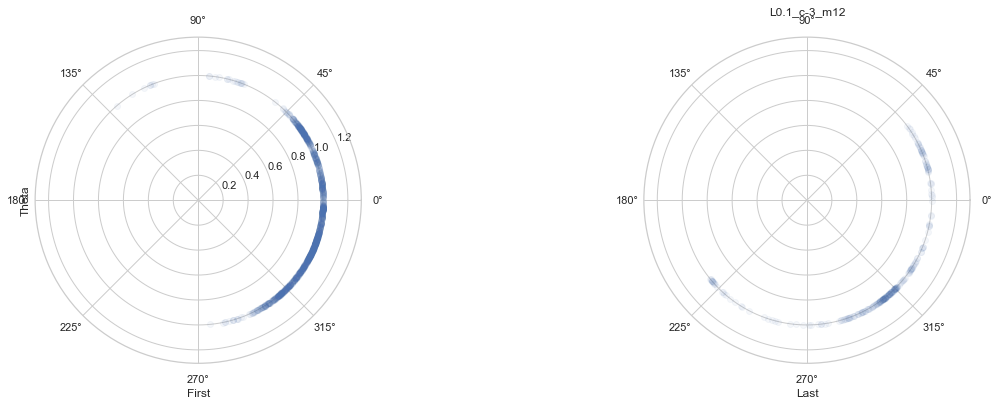

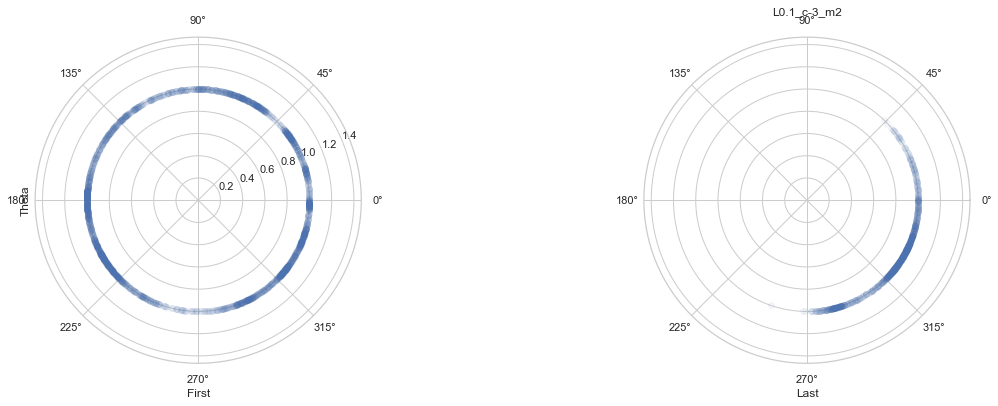

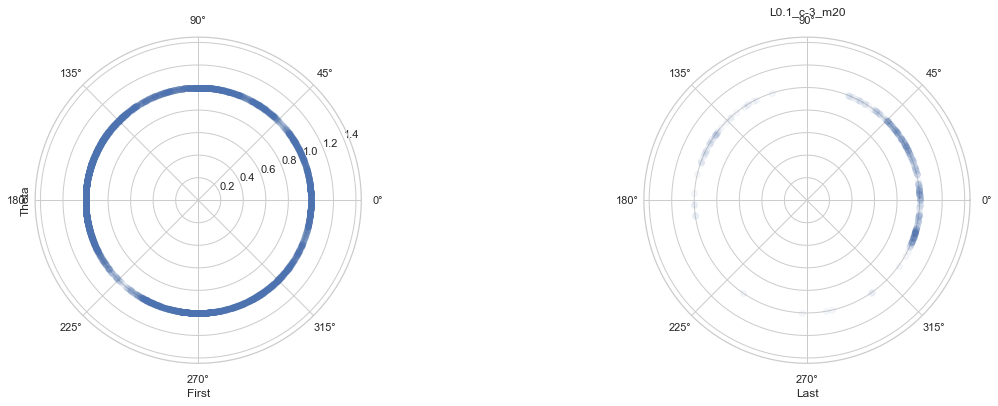

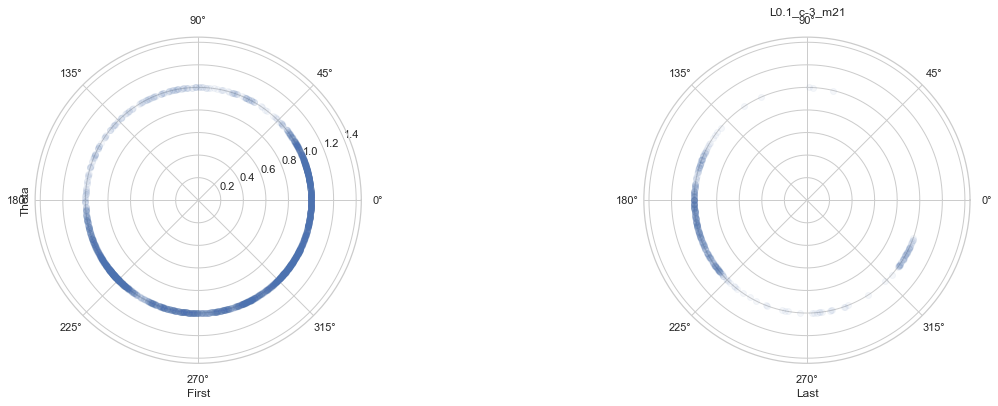

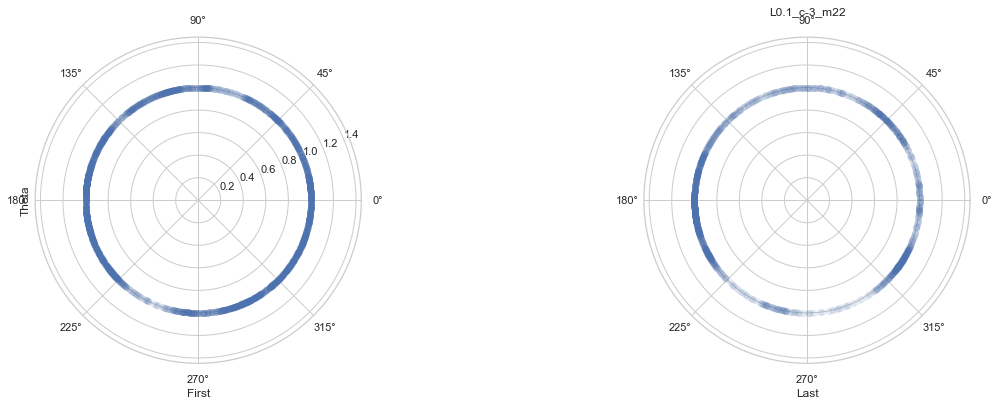

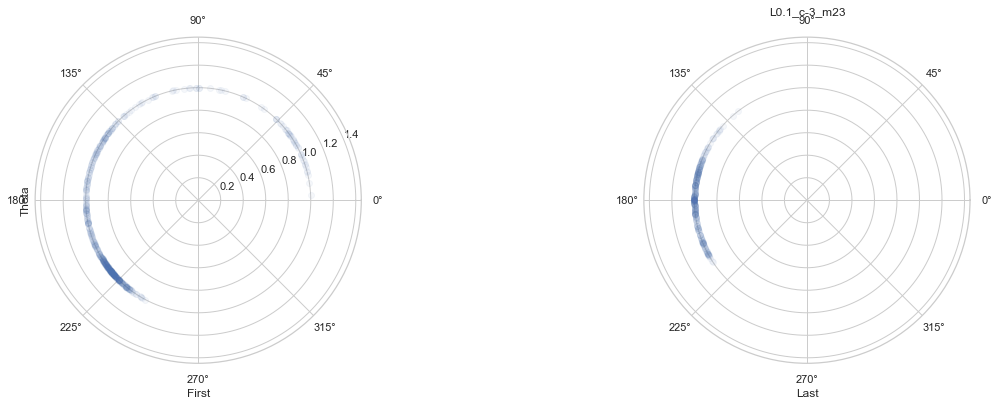

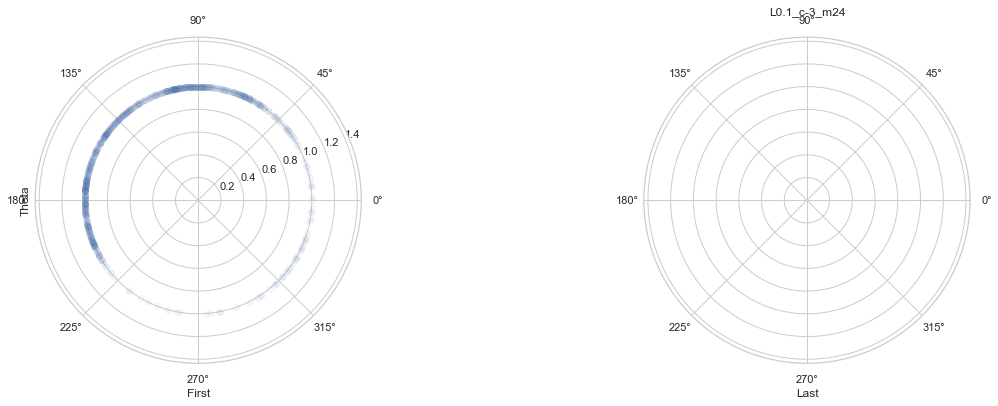

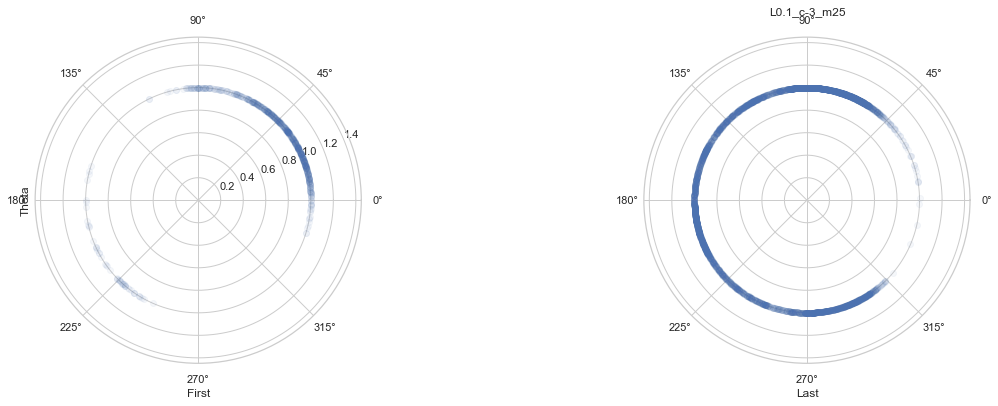

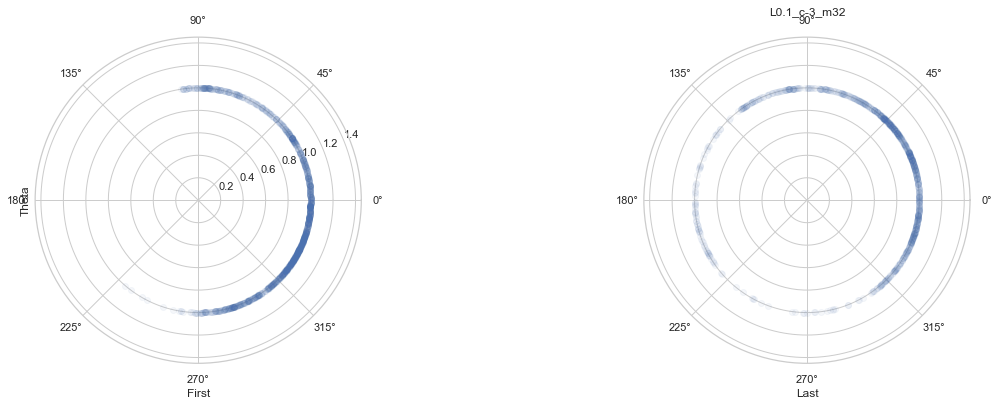

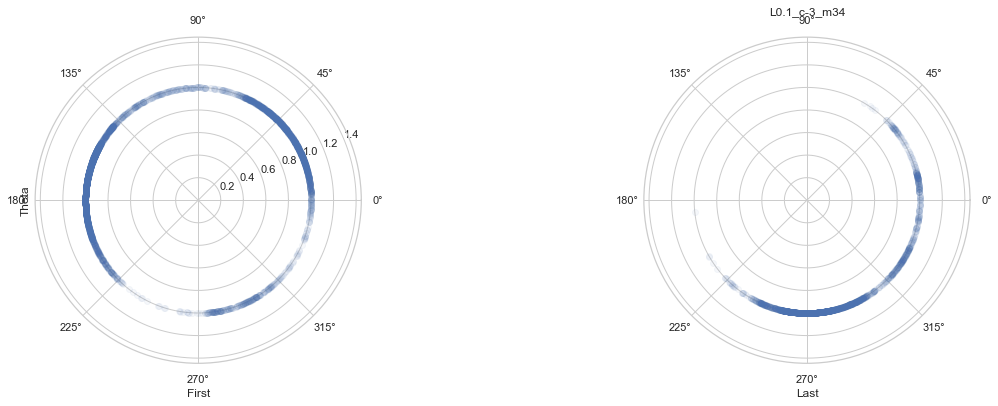

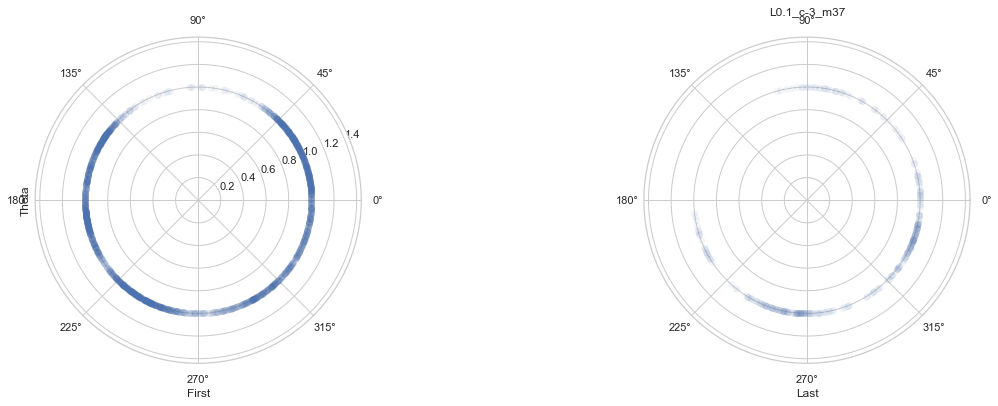

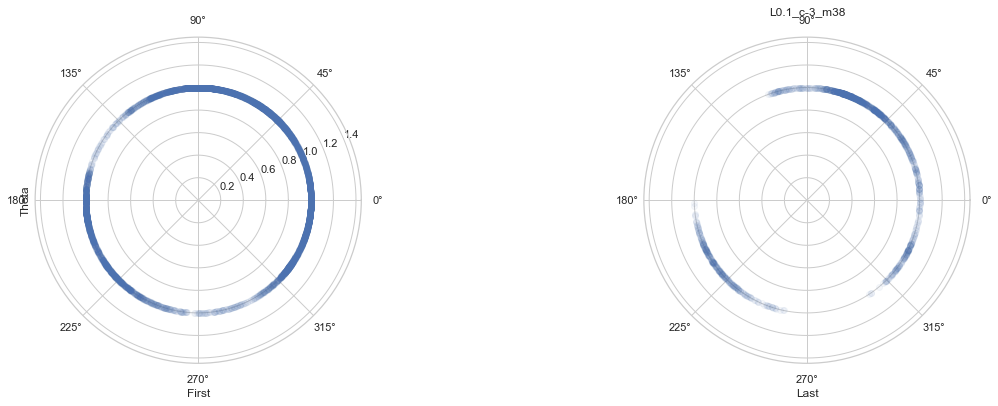

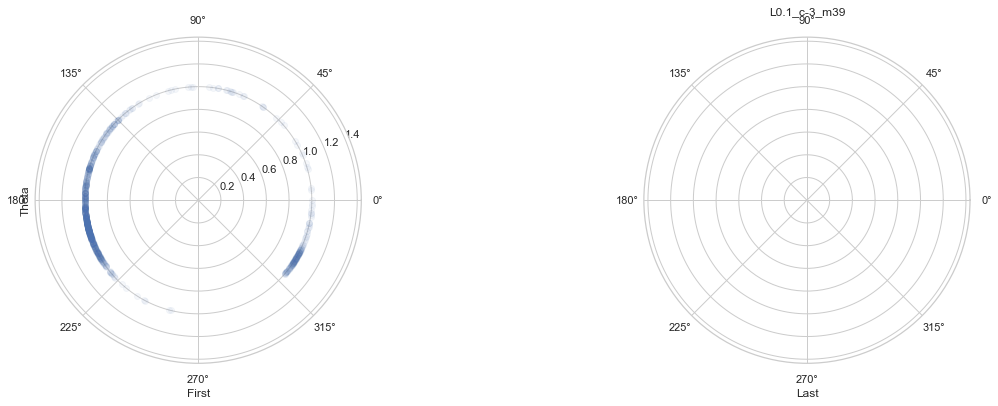

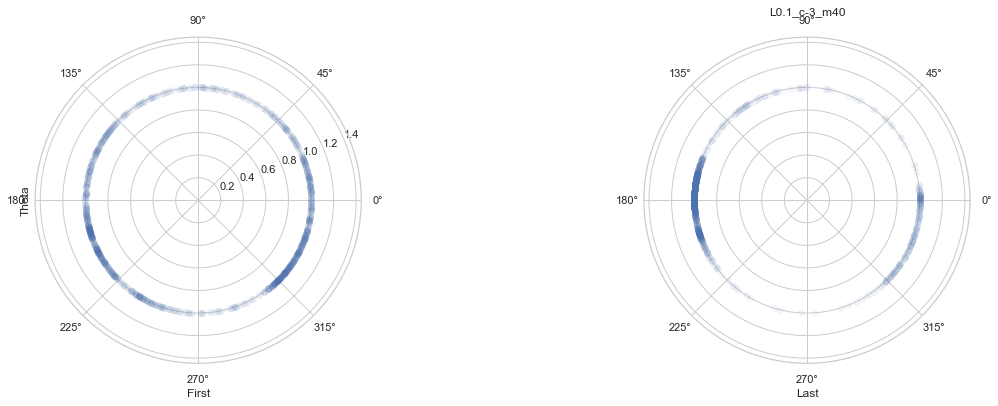

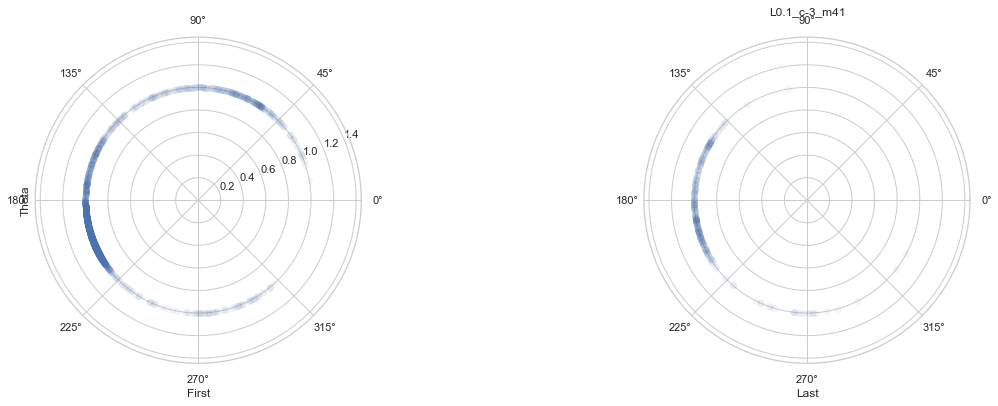

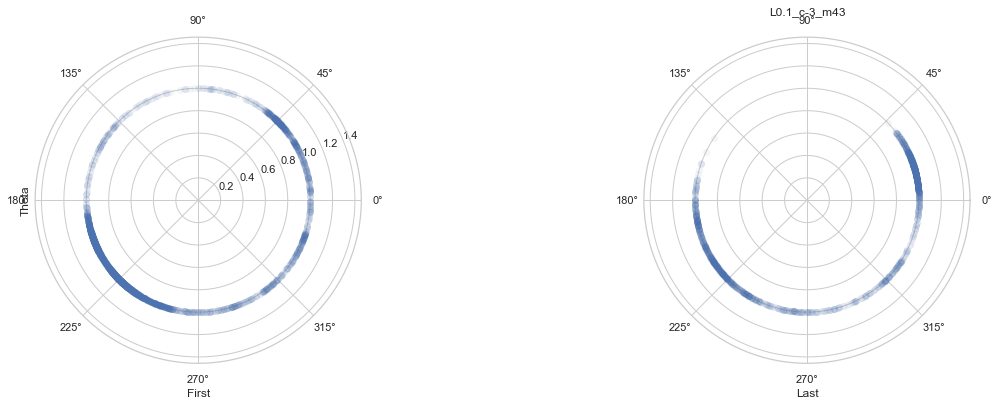

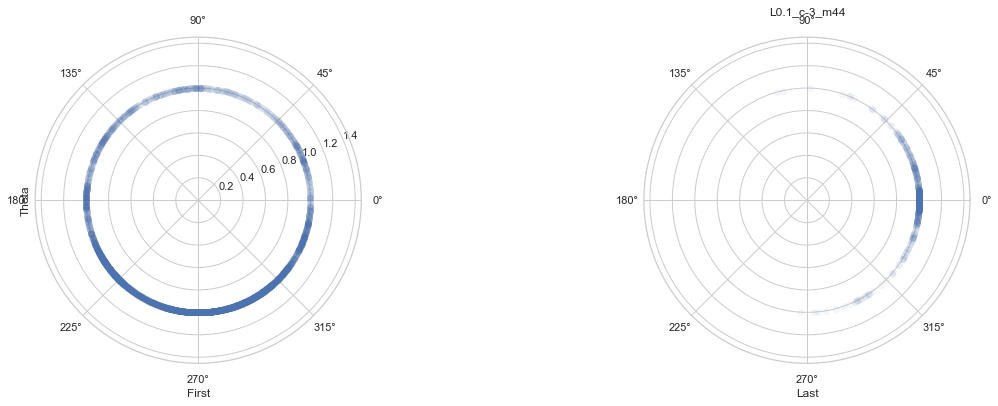

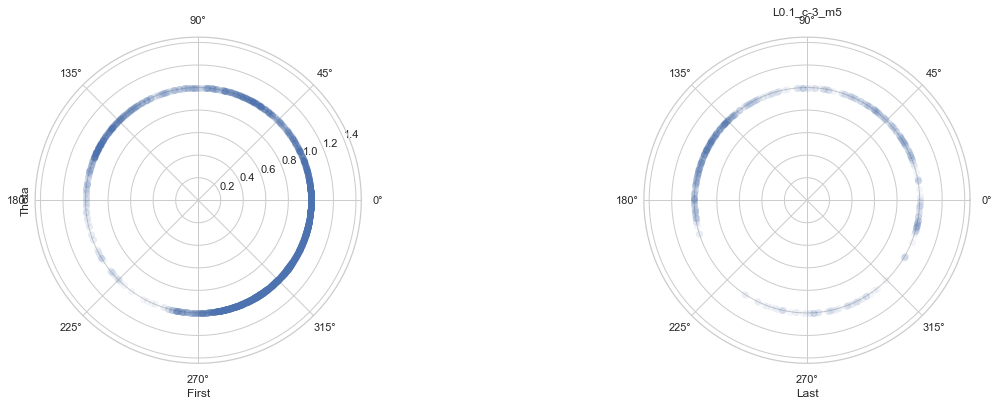

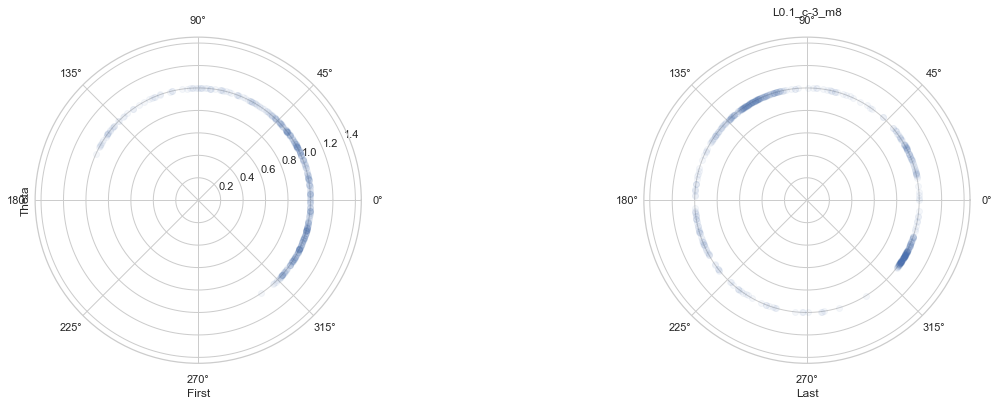

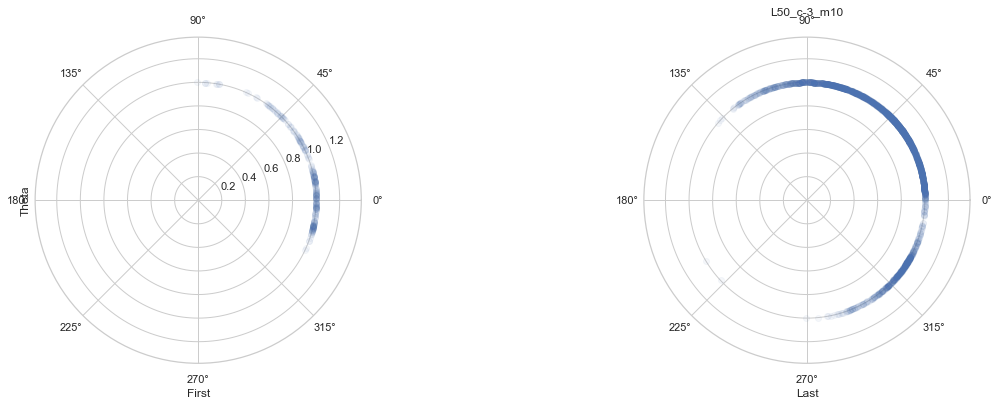

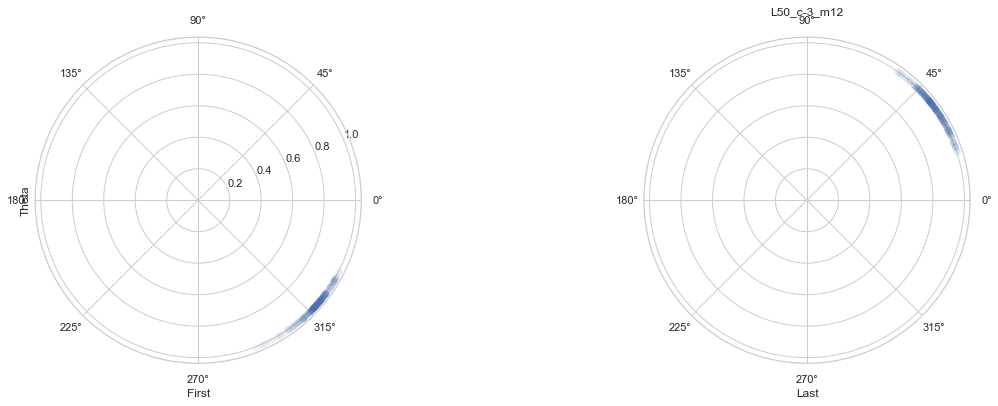

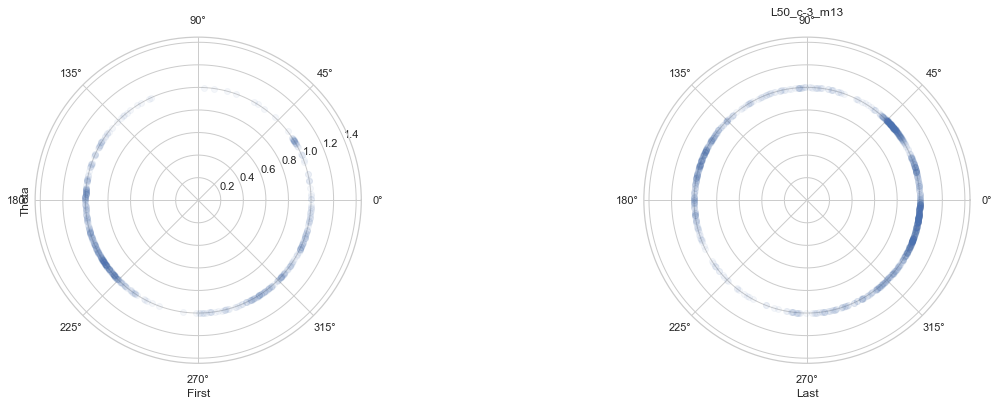

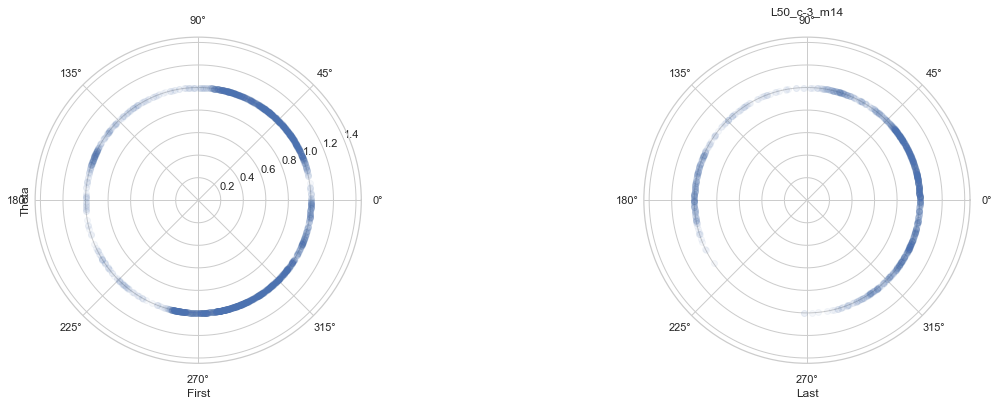

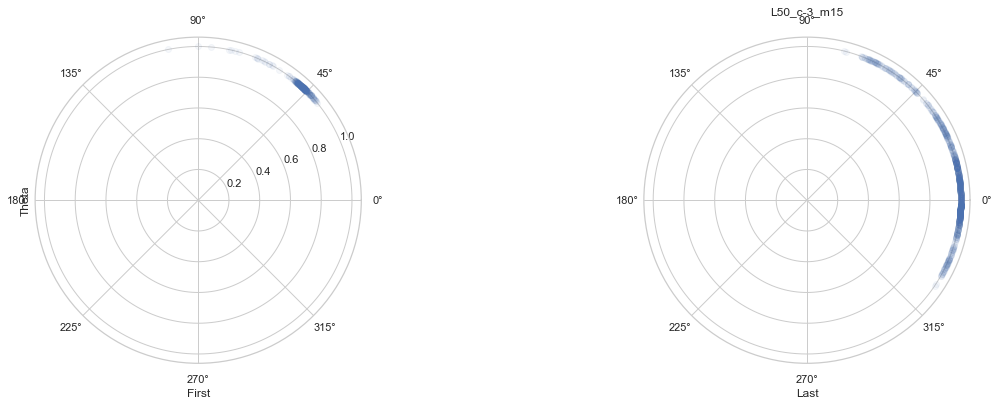

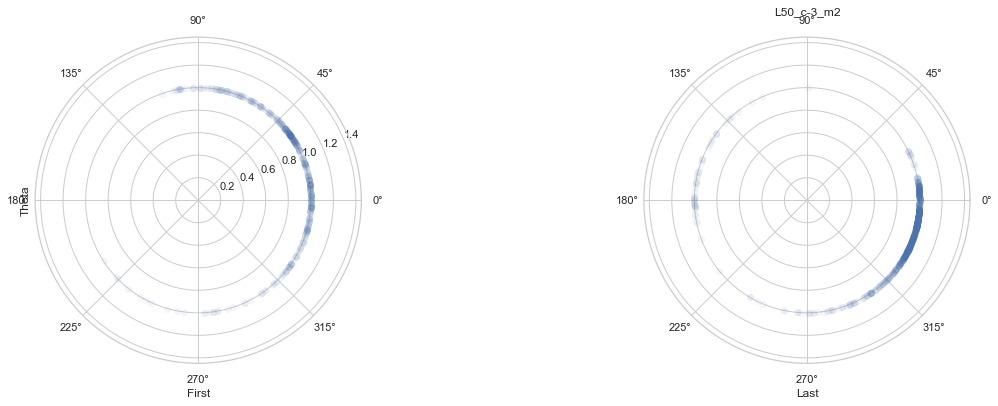

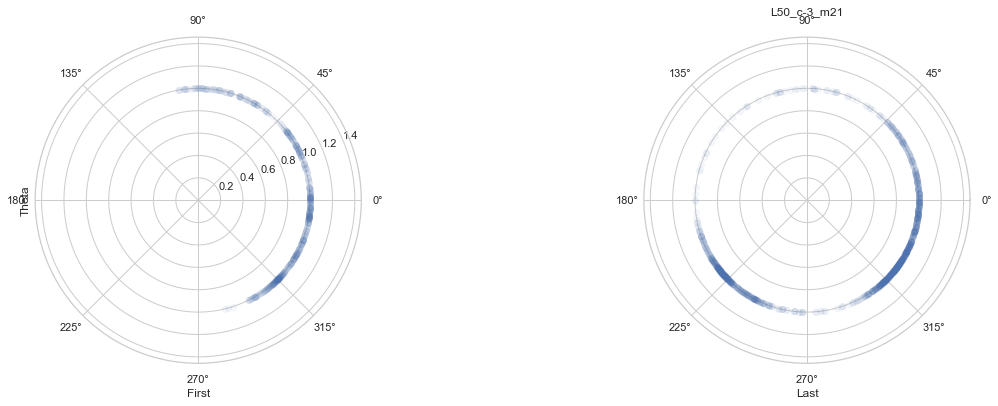

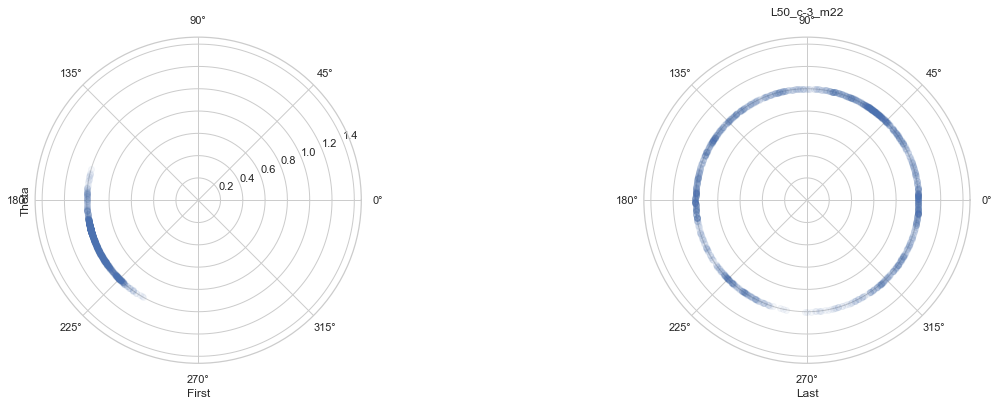

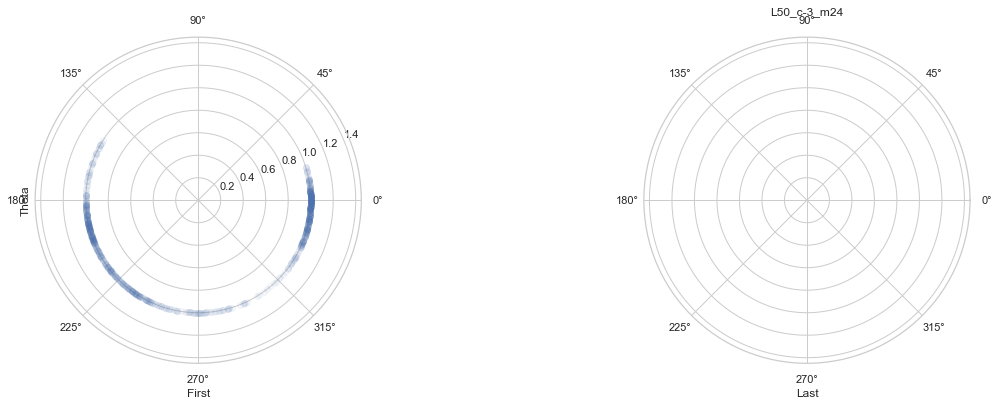

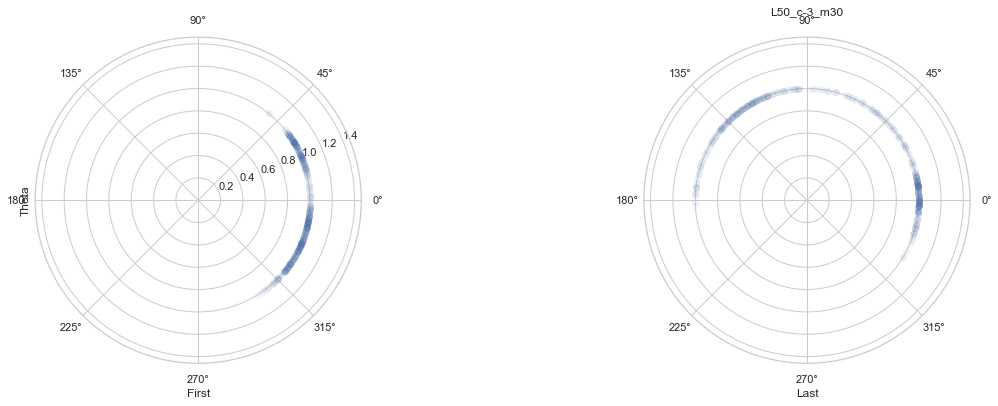

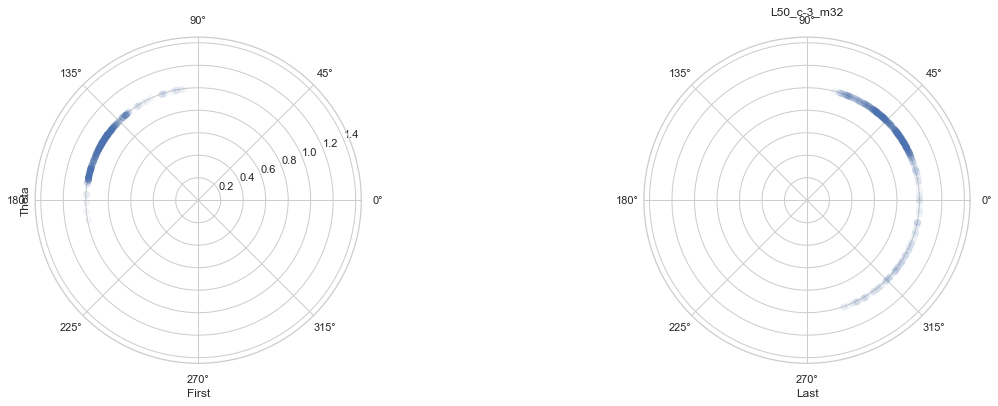

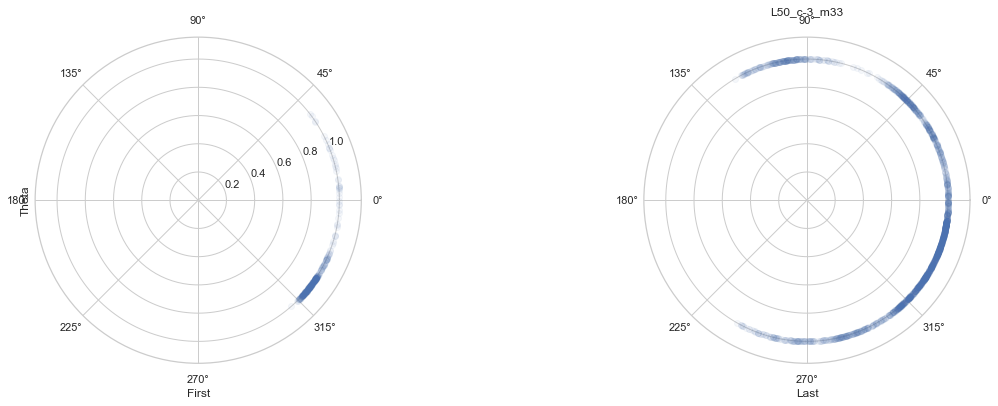

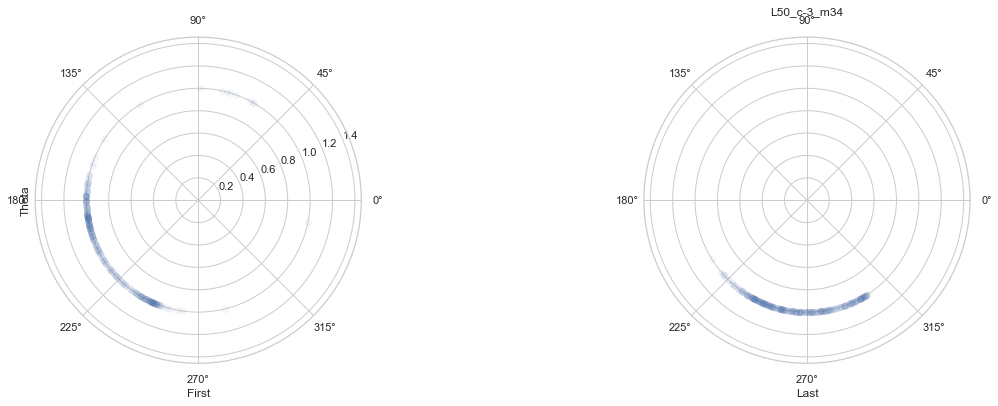

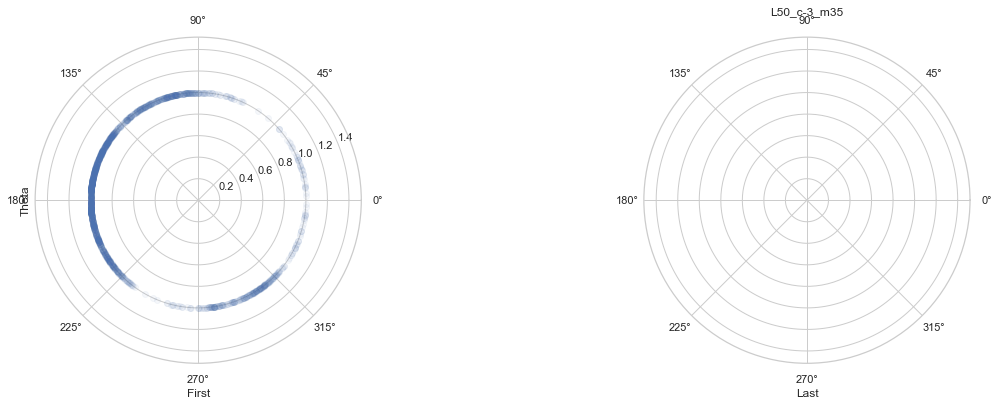

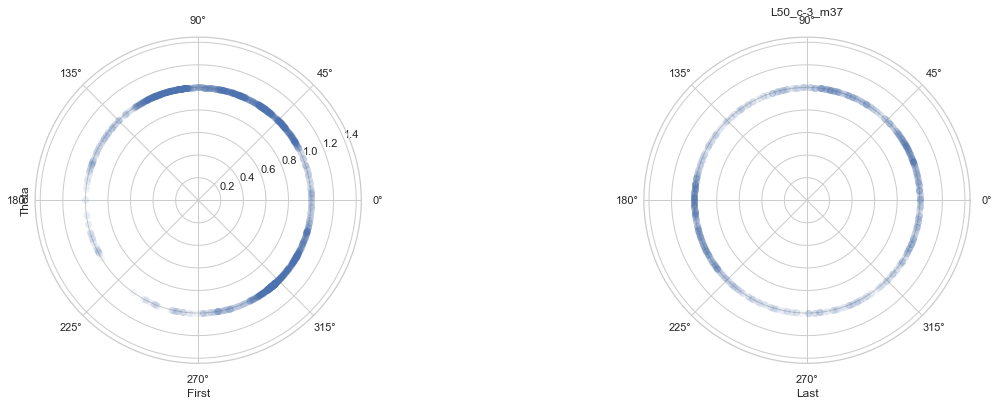

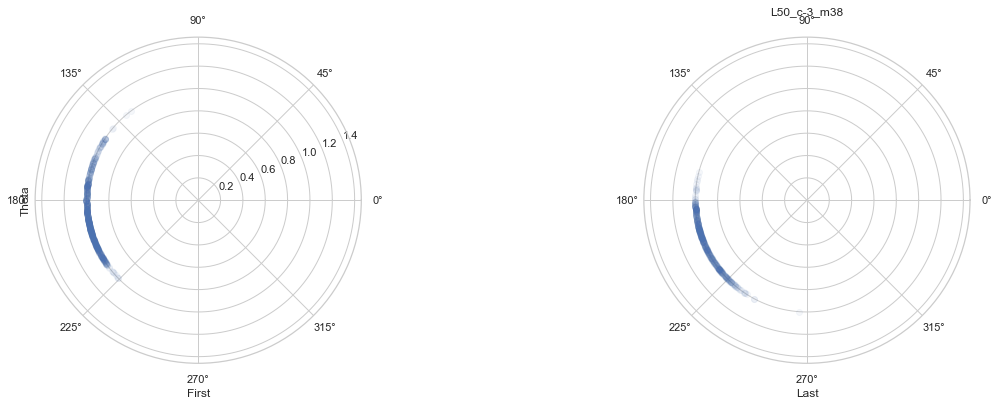

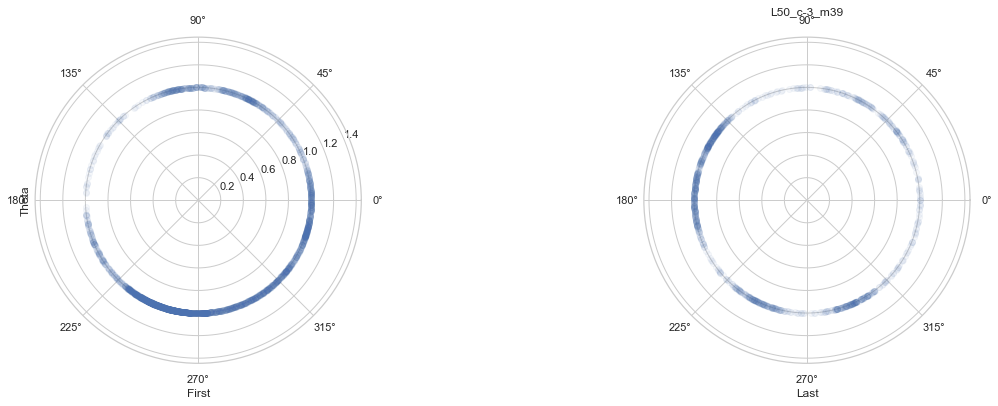

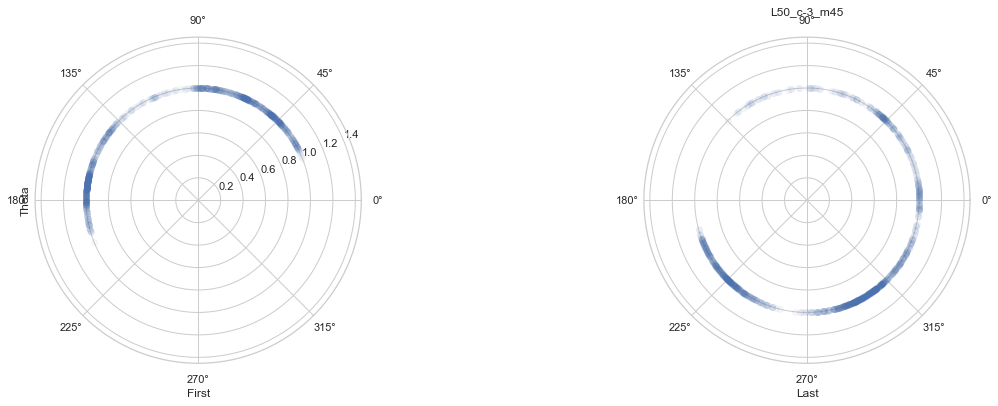

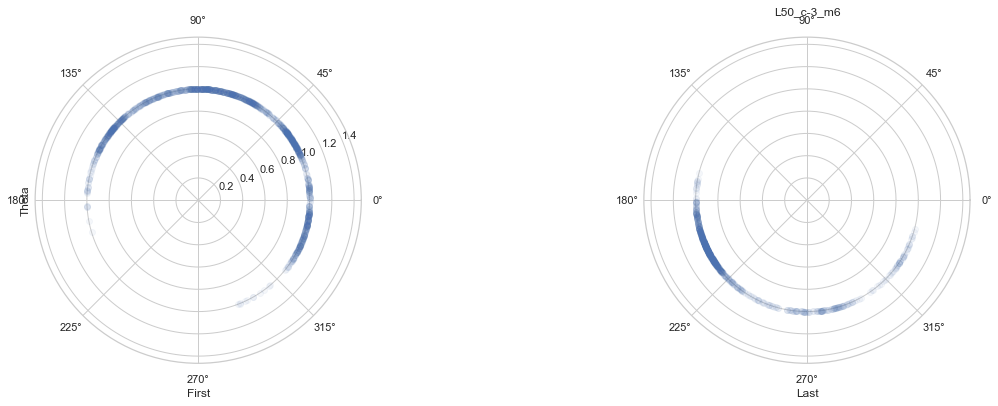

In [100]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Theta * np.pi/180


    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    

    if any(list(~np.isnan(rad_first_visit))) == True or any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), subplot_kw=dict(polar=True))

        radif = np.ones(len(rad_first_visit))
        radil = np.ones(len(rad_last_visit))

        ax[0].scatter(theta_pulled_first,radif, alpha = 0.05)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[1].scatter(theta_pulled_last,radil, alpha = 0.05)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot\Scatter" + "\\" + name + "_Scatter.png")
    else:
        print(name)
    


L0.1_c-3_m12


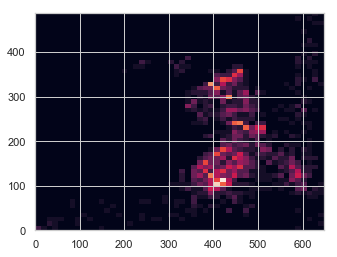

L0.1_c-3_m2


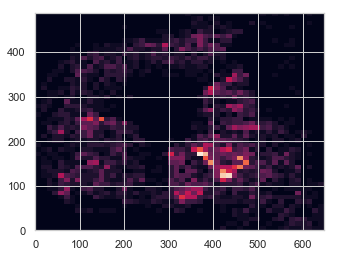

L0.1_c-3_m20


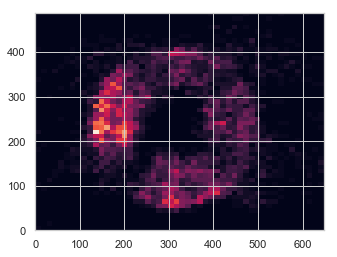

L0.1_c-3_m21


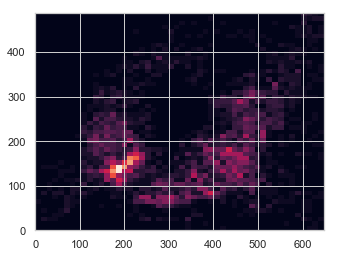

L0.1_c-3_m22


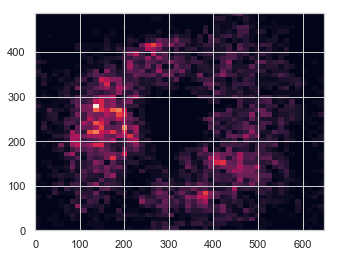

L0.1_c-3_m23


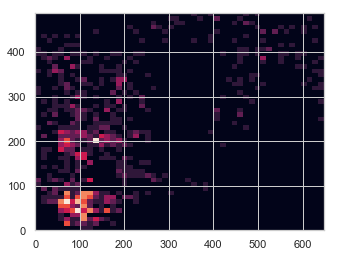

L0.1_c-3_m24


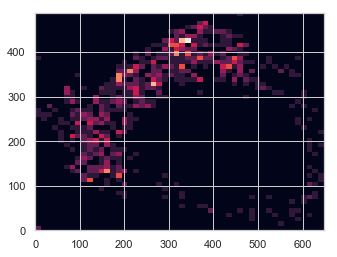

L0.1_c-3_m25


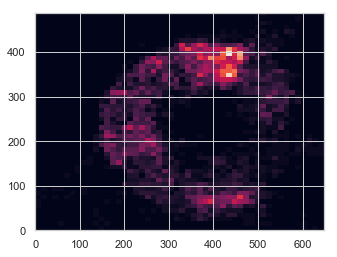

L0.1_c-3_m32


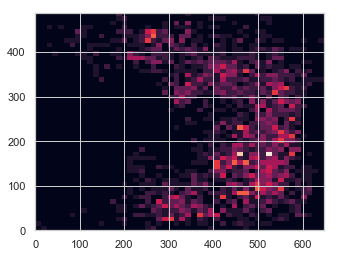

L0.1_c-3_m34


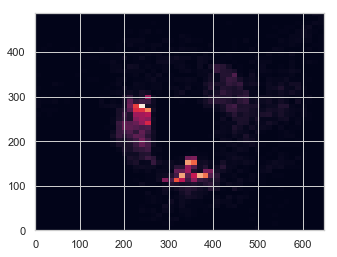

L0.1_c-3_m37


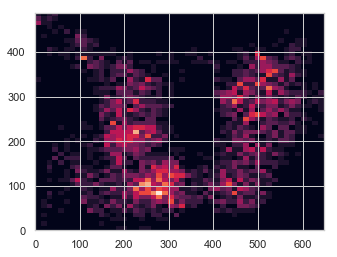

L0.1_c-3_m38


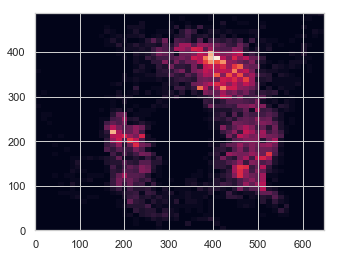

L0.1_c-3_m40


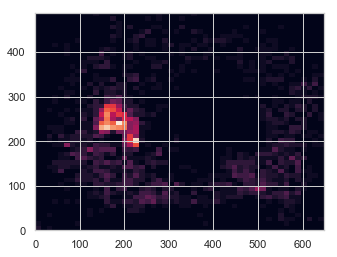

L0.1_c-3_m41


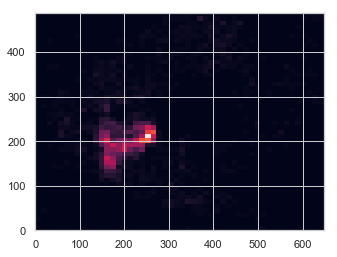

L0.1_c-3_m43


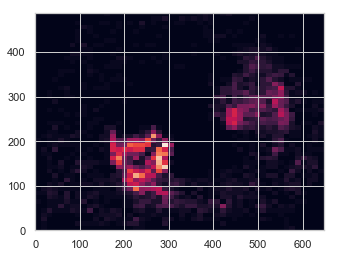

L0.1_c-3_m44


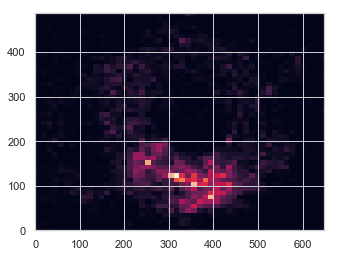

L0.1_c-3_m5


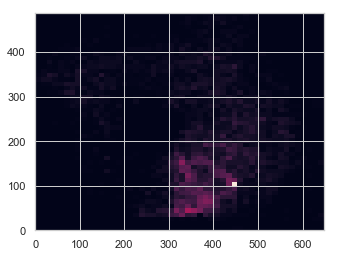

L0.1_c-3_m8


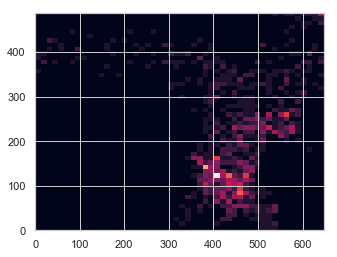

L50_c-3_m10


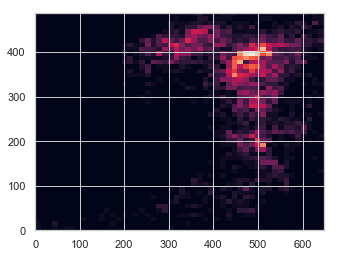

L50_c-3_m12


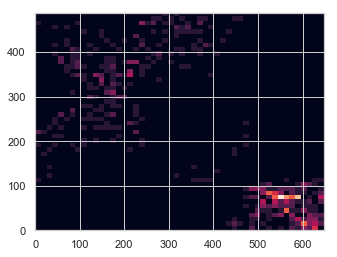

L50_c-3_m13


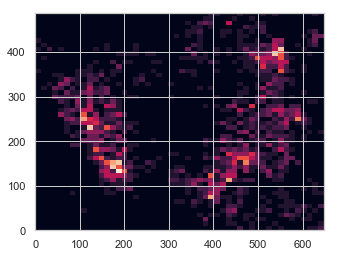

L50_c-3_m14


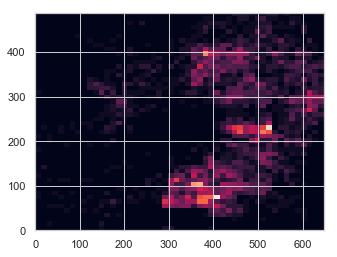

L50_c-3_m15


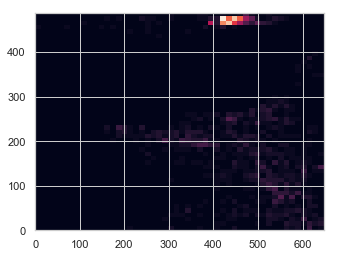

L50_c-3_m2


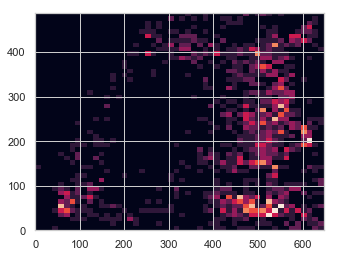

L50_c-3_m21


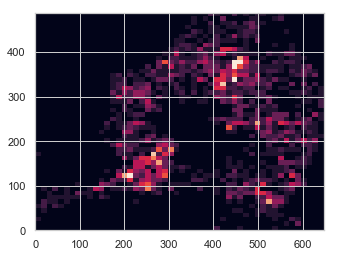

L50_c-3_m22


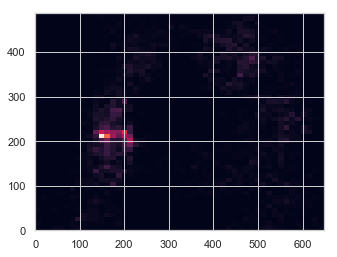

L50_c-3_m24


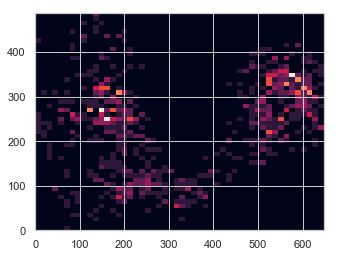

L50_c-3_m30


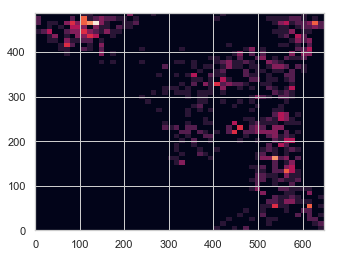

L50_c-3_m32


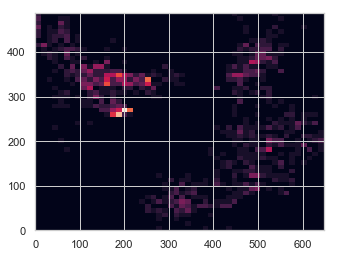

L50_c-3_m33


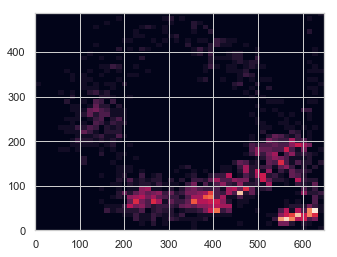

L50_c-3_m34


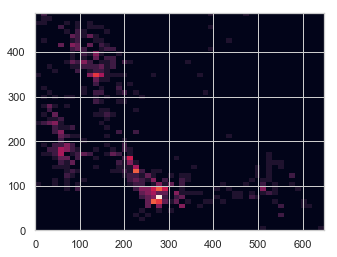

L50_c-3_m37


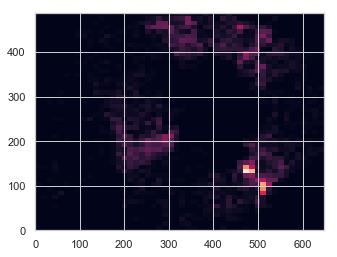

L50_c-3_m38


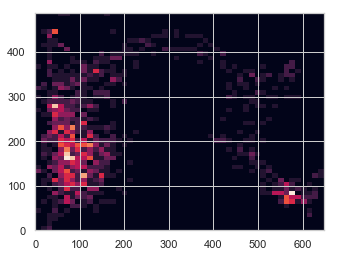

L50_c-3_m39


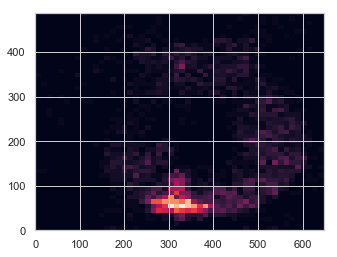

L50_c-3_m45


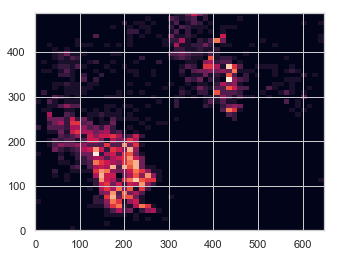

L50_c-3_m6


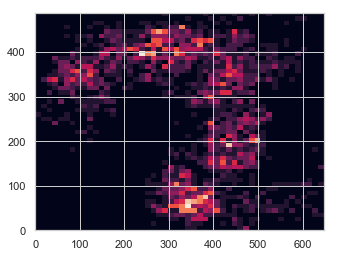

In [109]:
# Generate some test data
# data = pd.DataFrame()
pca_path = r"C:\Users\Daniellab\Documents\Mahad\PCA test case"
heatmap_FL = pd.DataFrame()
for name in heatmap_names:
    print(name)
    temp = FL_df[(FL_df.name == name)]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']



    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [0, 648, 0, 488]
    
    hmv_FL = pd.Series(heatmap.flatten(),name=name)
    heatmap_FL = heatmap_FL.append(hmv_FL)
    heatmap_FL.to_csv(pca_path + "\heatmap_vectors_FL.csv")
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
#     
#     plt.savefig(outpath_fig_ + "\\EntireTrial" + "\\" + name + "EntireTrial_HeatMap.png")
    plt.show()

In [70]:
dfd = pd.read_csv(pca_path + "\heatmap_vectors.csv")
dfd = dfd.set_index('Unnamed: 0')

In [71]:
dfd

0     1     2     3    4    5    6    7    8    9  ...   2490  \
Unnamed: 0                                                         ...          
L0.1_c-3_m12  3.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0   
L0.1_c-3_m2   0.0   0.0   2.0   0.0  0.0  0.0  0.0  0.0  1.0  4.0  ...    1.0   
L0.1_c-3_m20  0.0   8.0  13.0   6.0  7.0  4.0  2.0  3.0  2.0  4.0  ...    5.0   
L0.1_c-3_m21  3.0   8.0   6.0   3.0  5.0  4.0  4.0  1.0  1.0  2.0  ...    4.0   
L0.1_c-3_m22  2.0   5.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0  2.0  ...    1.0   
L0.1_c-3_m23  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  2.0  0.0  ...    0.0   
L0.1_c-3_m24  2.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L0.1_c-3_m25  0.0   0.0   0.0   0.0  0.0  1.0  1.0  0.0  1.0  0.0  ...    0.0   
L0.1_c-3_m32  0.0   0.0   2.0   2.0  0.0  1.0  1.0  1.0  0.0  1.0  ...    3.0   
L0.1_c-3_m34  0.0   0.0   3.0   2.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L0.1_c-3_m37  0.0   0.0   0.0   1.0  3.0  0.0  2.0  2.0  0.0  0.0  ...    0.0   
L0.1_c-3_m38  3.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    0.0   
L0.1_c-3_m39  0.0   1.0   1.0   1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...    0.0   
L0.1_c-3_m40  1.0   0.0   0.0   0.0  0.0  1.0  2.0  0.0  0.0  0.0  ...    2.0   
L0.1_c-3_m41  0.0   0.0   0.0   1.0  1.0  0.0  2.0  0.0  0.0  1.0  ...    1.0   
L0.1_c-3_m43  0.0   2.0   0.0   1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...    0.0   
L0.1_c-3_m44  1.0   1.0   0.0   1.0  0.0  0.0  4.0  1.0  0.0  1.0  ...    1.0   
L0.1_c-3_m5   3.0   4.0   8.0  10.0  0.0  4.0  2.0  0.0  0.0  3.0  ...    1.0   
L0.1_c-3_m8   0.0   1.0   1.0   1.0  3.0  1.0  2.0  1.0  1.0  1.0  ...    2.0   
L50_c-3_m10   1.0   1.0   0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  ...    0.0   
L50_c-3_m12   2.0   2.0   4.0   5.0  0.0  1.0  3.0  2.0  1.0  1.0  ...    1.0   
L50_c-3_m13   0.0   0.0   3.0   5.0  0.0  0.0  1.0  1.0  0.0  0.0  ...    3.0   
L50_c-3_m14   0.0   0.0   2.0   0.0  0.0  0.0  0.0  0.0  3.0  0.0  ...    1.0   
L50_c-3_m15   1.0   1.0   0.0   2.0  2.0  0.0  0.0  0.0  0.0  0.0  ...    2.0   
L50_c-3_m2    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m21   1.0   0.0   1.0   1.0  1.0  2.0  0.0  2.0  2.0  1.0  ...    0.0   
L50_c-3_m22   3.0  21.0   5.0   5.0  5.0  6.0  4.0  4.0  8.0  5.0  ...    5.0   
L50_c-3_m24   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m30   0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m32   0.0   1.0   0.0   0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    0.0   
L50_c-3_m33   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m34   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m35   1.0   0.0   1.0   1.0  2.0  1.0  3.0  0.0  1.0  1.0  ...    1.0   
L50_c-3_m37   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m38   0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...    0.0   
L50_c-3_m39   0.0   1.0   0.0   0.0  1.0  1.0  0.0  0.0  0.0  1.0  ...    0.0   
L50_c-3_m45   0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...    1.0   
L50_c-3_m6    0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...    0.0   

              2491  2492  2493  2494  2495  2496  2497  2498  2499  
Unnamed: 0                                                          
L0.1_c-3_m12   0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0   0.0  
L0.1_c-3_m2    1.0   2.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0  
L0.1_c-3_m20   2.0   4.0   5.0   2.0   2.0   5.0   1.0   2.0   4.0  
L0.1_c-3_m21   1.0   4.0   3.0   6.0   3.0   5.0   1.0   1.0   0.0  
L0.1_c-3_m22   0.0   1.0   2.0   0.0   1.0   0.0   1.0   1.0   0.0  
L0.1_c-3_m23   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
L0.1_c-3_m24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
L0.1_c-3_m25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
L0.1_c-3_m32   0.0   2.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  
L0.1_c-3_m34   0

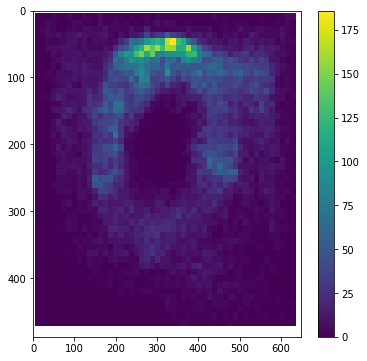

In [101]:
# Generate some test data
outpath_fig_ = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap"
for name in nam_51[-3:-2]:
    
    x = dFrame[(dFrame.name == name) & (dFrame.X_position.notnull())].X_position 
    y = dFrame[(dFrame.name == name) & (dFrame.Y_position.notnull())].Y_position

    fig, ax = plt.subplots(1, 1, figsize = (6,6), subplot_kw=dict(polar=False))

    counts, xedges, yedges, im = ax.hist2d(x, y, bins=50)
    fig.colorbar(im)
    ax.set_ylim(0,488)
    ax.set_xlim(0,648)
    plt.gca().invert_yaxis()
    extent = [0, 648, 488, 0]
    
#     plt.clf()
#     plt.imshow(heatmap, extent=extent, origin='lower')
    
#     plt.savefig(outpath_fig_ + "\\" + name + "_heatMap_setbin.png")
    plt.show()

L0.1_c-3_m12


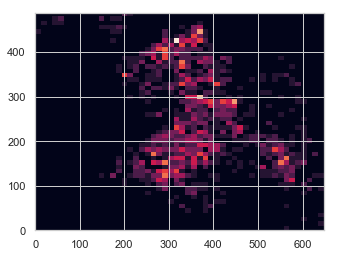

L0.1_c-3_m2


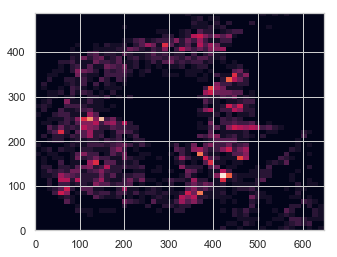

L0.1_c-3_m20


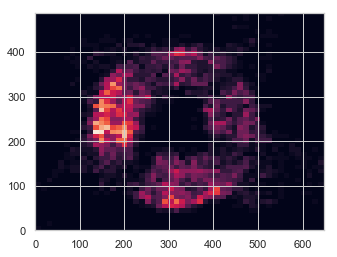

L0.1_c-3_m21


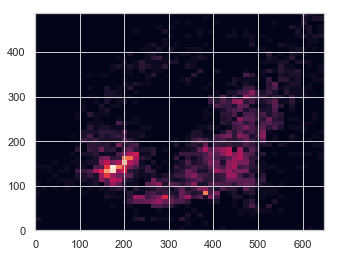

L0.1_c-3_m22


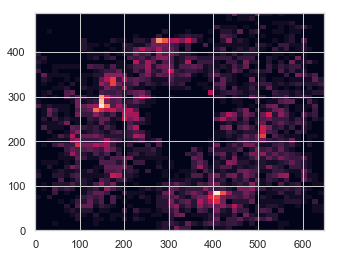

L0.1_c-3_m23


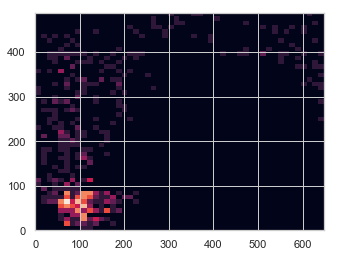

L0.1_c-3_m24


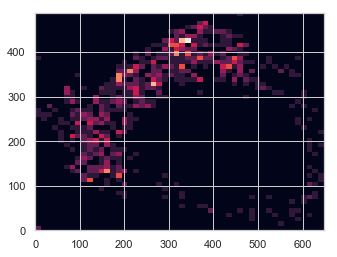

L0.1_c-3_m25


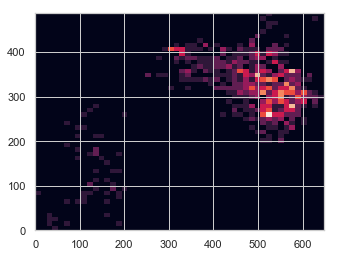

L0.1_c-3_m32


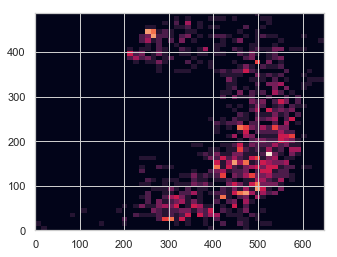

L0.1_c-3_m34


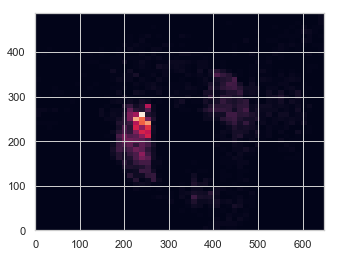

L0.1_c-3_m37


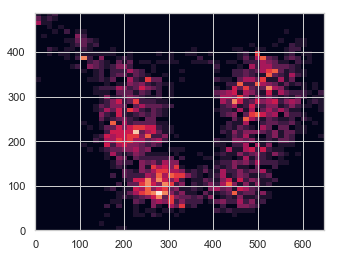

L0.1_c-3_m38


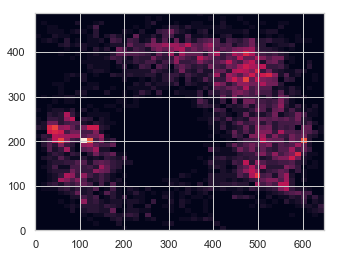

L0.1_c-3_m40


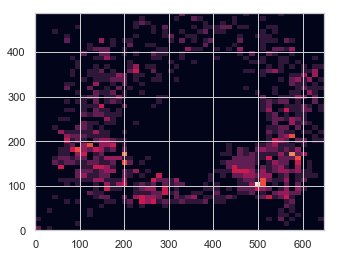

L0.1_c-3_m41


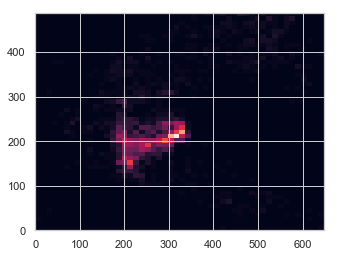

L0.1_c-3_m43


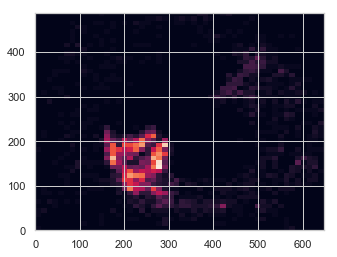

L0.1_c-3_m44


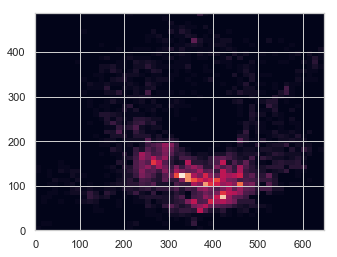

L0.1_c-3_m5


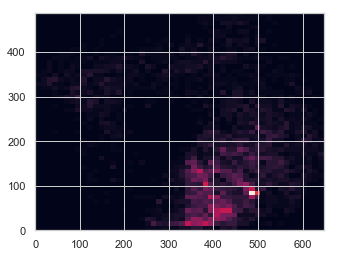

L0.1_c-3_m8


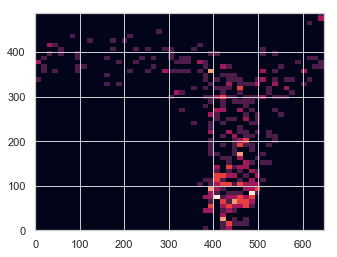

L50_c-3_m10


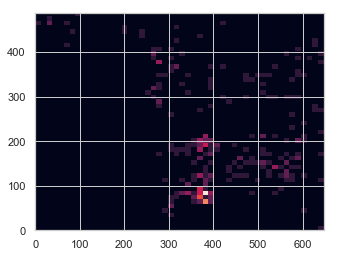

L50_c-3_m12


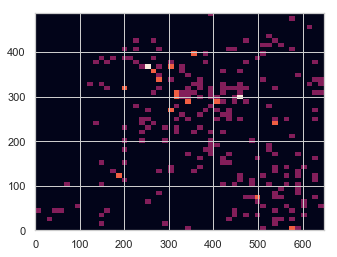

L50_c-3_m13


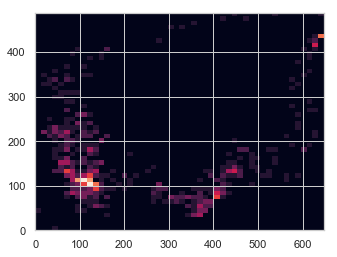

L50_c-3_m14


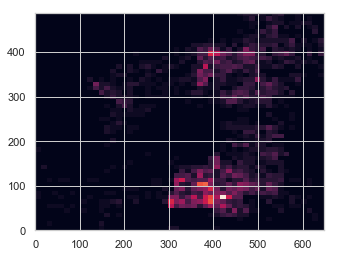

L50_c-3_m15


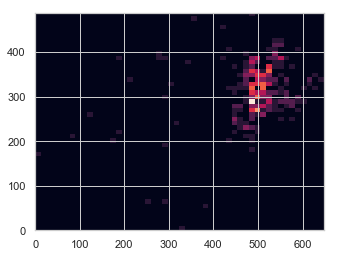

L50_c-3_m2


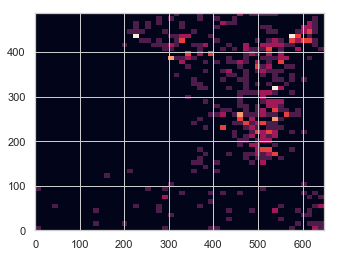

L50_c-3_m21


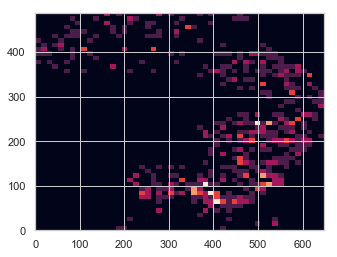

L50_c-3_m22


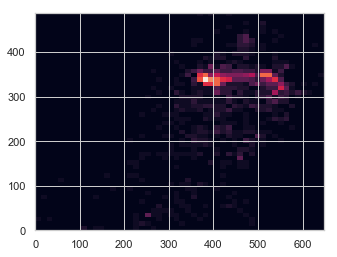

L50_c-3_m24


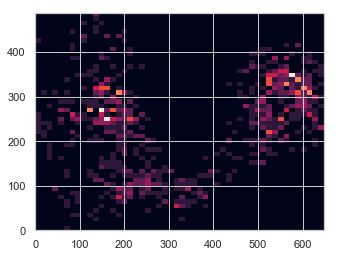

L50_c-3_m30


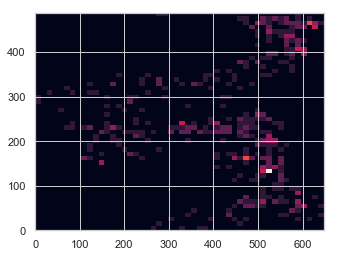

L50_c-3_m32


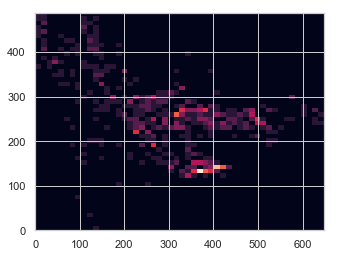

L50_c-3_m33


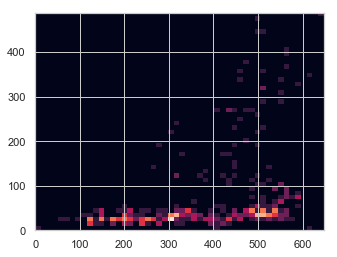

L50_c-3_m34


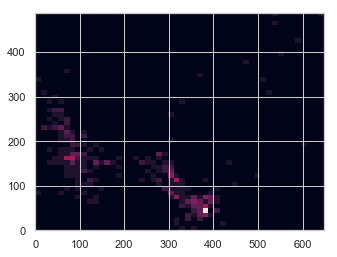

L50_c-3_m37


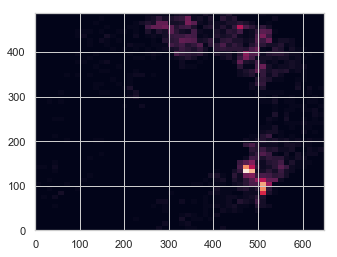

L50_c-3_m38


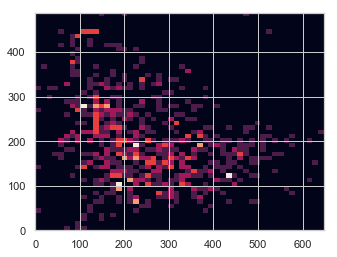

L50_c-3_m39


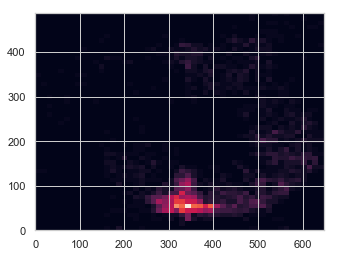

L50_c-3_m45


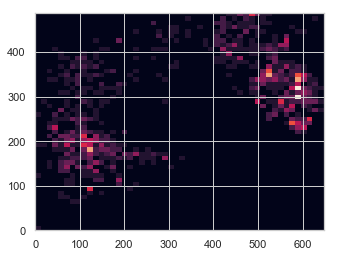

L50_c-3_m6


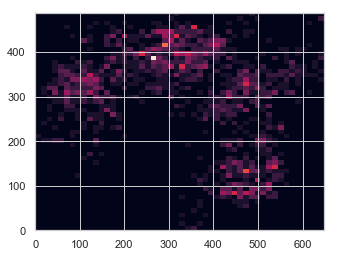

In [106]:
# Generate some test data
outpath_fig_first = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\Last"
dataf = pd.DataFrame()
pca_path = r"C:\Users\Daniellab\Documents\Mahad\PCA test case"
heatmap_names = ['L0.1_c-3_m12', 'L0.1_c-3_m2', 'L0.1_c-3_m20', 'L0.1_c-3_m21',
       'L0.1_c-3_m22', 'L0.1_c-3_m23', 'L0.1_c-3_m24', 'L0.1_c-3_m25',
       'L0.1_c-3_m32', 'L0.1_c-3_m34', 'L0.1_c-3_m37', 'L0.1_c-3_m38',
       'L0.1_c-3_m40', 'L0.1_c-3_m41', 'L0.1_c-3_m43',
       'L0.1_c-3_m44', 'L0.1_c-3_m5', 'L0.1_c-3_m8', 'L50_c-3_m10',
       'L50_c-3_m12', 'L50_c-3_m13', 'L50_c-3_m14', 'L50_c-3_m15',
       'L50_c-3_m2', 'L50_c-3_m21', 'L50_c-3_m22', 'L50_c-3_m24',
       'L50_c-3_m30', 'L50_c-3_m32', 'L50_c-3_m33', 'L50_c-3_m34',
       'L50_c-3_m37', 'L50_c-3_m38', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m6']

for name in heatmap_names:
    print(name)
    
    temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']

   

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [0, 648, 0, 488]

    
    hmv_first = pd.Series(heatmap.flatten(),name=name)
    
    dataf = dataf.append(hmv_first)
    dataf.to_csv(pca_path + "\heatmap_vectors_first.csv")

    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    
#     plt.savefig(outpath_fig_first + "\\" + name + "FirstTrial_HeatMap.png")
    plt.show()

True


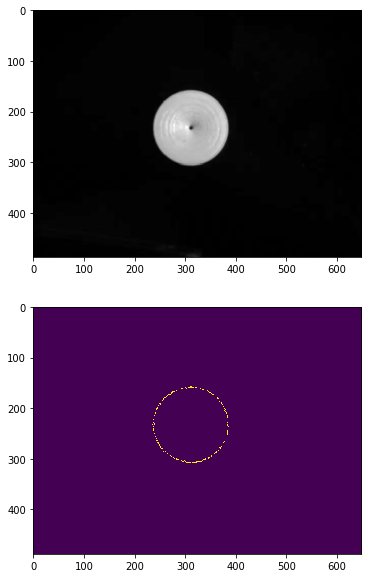

In [99]:
video_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Other_videos"
video_list = glob.glob(video_path + '\\' + '*.mp4')
video_list

vid = cv2.VideoCapture(video_list[0])

width = vid.get(3)
height = vid.get(4)

ret = vid.set(1,1)
print(ret)

ret, frame = vid.read(1)

# plt.imshow(frame)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)

edges = canny(blurred, sigma = 5)

hough_radii = np.arange(50, 150, 1)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

fig, ax = plt.subplots(figsize=(10, 6))
bckgrnd_tmp = color.gray2rgb(frame)
plt.scatter(cx[0],cy[0], 20, c="red")
circy, circx = circle_perimeter(cy[0], cx[0], radii[0])
bckgrnd_tmp[circy, circx] = (20, 220, 20)
ax.imshow(bckgrnd_tmp, cmap='gray')

# fig, ax = plt.subplots(2,1, figsize = (30,10) )

# ax[0].imshow(blurred, cmap = 'gray')
# ax[1].imshow(edges)